# Problem Statement:
#### `Description`

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### `Key attributes of the database`

The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### `Prediction` :   Make two prediction  `1) Primary Fuel`    `2) capacity_mw `

# `Capacity_mw:`

In [1]:
## Importing primary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings as war
war.filterwarnings('always')
war.filterwarnings('ignore')

## DataSet Importing


In [2]:
df=pd.read_csv('Global_Power_Plant_Dataset.csv')
pd.set_option("display.max_columns",None)
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     other_fuel3  commissioning_year                                owner  \
0            NaN              2011.0                          Solar Paces   
1            NaN                 NaN                 Ultratech Cement ltd   
2            NaN                 NaN                                  AES   
3            NaN              2004.0                                  NaN   
4            NaN              2015.0                                  NaN   
..           ...                 ...                                  ...   
902          NaN              2016.0                                  NaN   
903          NaN                 NaN  Karnataka Power Corporation Limited   
904          NaN                 NaN                                  NaN   
905          NaN                 NaN                   Hindustan Zinc ltd   
906          NaN                 NaN                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source  wepp_id  year_of_cap

In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.shape

(907, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

## Outputs:-
- Our dataset is small dataset.
- There are 907 Rows and 27 Columns including Target variable.
- We have only two types of data present in our dataset, one is Float type and second one is Object or text data type.
- In above information we can see there is a good number of missing values present. Even some columns have zero information  available. We will romove those columns  ahead.


## Checking or Confiming the Nulls

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Before going ahead I am going to drop those columns which have all nulls. It will help us to understanding in better observation of statitics summary of dataset.

Those columns listed below:
- `other_fuel1 `
- `other_fuel2 `
- `other_fuel3`
- `wepp_id`
- `generation_gwh_2013`
- `generation_gwh_2019`
- `estimated_generation_gwh`

### Dropping Empty Columns:

In [7]:
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019',
                   'estimated_generation_gwh'],axis=1,inplace=True)
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel  commissioning_year                 owner  \
0   28.1839    73.2407        Solar              2011.0           Solar Paces   
1   24.7663    74.6090         Coal                 NaN  Ultratech Cement ltd   
2   21.9038    69.3732         Wind                 NaN                   AES   
3   23.8712    91.3602          Gas              2004.0                   NaN   
4   21.9603    82.4091         Coal              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   
2                                   WRI                    NaN   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0                  NaN                  NaN                            NaN  
1                  NaN                  NaN                            NaN  
2                  NaN                  NaN                            NaN  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority

## Summary of Statistics

In [8]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  861.000000  861.000000          527.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.239612    4.939316           17.082868   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   16.773900   74.256200         1988.000000   
50%      59.200000   21.780000   76.719500         2001.000000   
75%     385.250000   25.512400   79.440800         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
count                  519.0           398.000000           422.000000   
mean                  2019.0          2431.823590          2428.226946   
std                      0.0          4026.440035          4194.596959   
min                   2019.0             0.000000             0.000000   
25%                   2019.0           223.557672           176.381063   
50%                   2019.0           801.123775           711.181225   
75%                   2019.0          3035.306250          3084.121250   
max                   2019.0         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           434.000000           440.000000           448.000000  
mean           2467.936859          2547.759305          2600.804099  
std            4162.884308          4196.991169          4314.880456  
min               0.000000             0.000000             0.000000  
25%             188.285252           177.874930           193.378250  
50%             737.205450           817.977250           751.644375  
75%            3282.861313          3275.690475          3143.535900  
max           30015.000000         35116.000000         35136.000000

### Conclusion:
 As we can see there  is lot of missing values present in our dataset. First of all we will fill NANs so that we will understand the better stats of our dataset.

## Handling the NANs
We will use KNN imputer method to fill NANs. KNN Imputer was first supported by Scikit-learn in December 2019 when it was released its version0.22. This imputer utilizes the k-nearest neighbors method to replace missing values in the datasets with the mean value of the parameter 'n-neighbors' nearest neighbors found in the training set. BY default it uses a Euclidean metric to impute the missing values.


In [9]:
## checking the correlation
df.corr()

capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw               1.000000  0.051309   0.197129            0.304087   
latitude                  0.051309  1.000000   0.036362            0.129902   
longitude                 0.197129  0.036362   1.000000            0.121910   
commissioning_year        0.304087  0.129902   0.121910            1.000000   
year_of_capacity_data          NaN       NaN        NaN                 NaN   
generation_gwh_2014       0.839094  0.060330   0.013511            0.160014   
generation_gwh_2015       0.844352  0.048610   0.022760            0.170363   
generation_gwh_2016       0.870620  0.041387   0.050732            0.193743   
generation_gwh_2017       0.886673  0.040568   0.048678            0.191367   
generation_gwh_2018       0.901918  0.040476   0.045599            0.193694   

                       year_of_capacity_data  generation_gwh_2014  \
capacity_mw                              NaN             0.839094   
latitude                                 NaN             0.060330   
longitude                                NaN             0.013511   
commissioning_year                       NaN             0.160014   
year_of_capacity_data                    NaN                  NaN   
generation_gwh_2014                      NaN             1.000000   
generation_gwh_2015                      NaN             0.961098   
generation_gwh_2016                      NaN             0.937060   
generation_gwh_2017                      NaN             0.912561   
generation_gwh_2018                      NaN             0.902781   

                       generation_gwh_2015  generation_gwh_2016  \
capacity_mw                       0.844352             0.870620   
latitude                          0.048610             0.041387   
longitude                         0.022760             0.050732   
commissioning_year                0.170363             0.193743   
year_of_capacity_data                  NaN                  NaN   
generation_gwh_2014               0.961098             0.937060   
generation_gwh_2015               1.000000             0.974918   
generation_gwh_2016               0.974918             1.000000   
generation_gwh_2017               0.940191             0.972024   
generation_gwh_2018               0.934371             0.962073   

                       generation_gwh_2017  generation_gwh_2018  
capacity_mw                       0.886673             0.901918  
latitude                          0.040568             0.040476  
longitude                         0.048678             0.045599  
commissioning_year                0.191367             0.193694  
year_of_capacity_data                  NaN                  NaN  
generation_gwh_2014               0.912561             0.902781  
generation_gwh_2015               0.940191             0.934371  
generation_gwh_2016               0.972024             0.962073  
generation_gwh_2017               1.000000             0.985856  
generation_gwh_2018               0.985856             1.000000

 As we can see above correlation that generation_gwn of every  year is direct  more then 80% correlate with capacity_mw. so now we will impute them with bases of capacity_mw.

Knn imputer will find nearest 7 datapoint in capacity_mw feature and get mean of it's corresponding column.

##### handling missing values for generation_gwn.

In [10]:
from sklearn.impute import KNNImputer
knn_im=KNNImputer(n_neighbors=7)

In [11]:
df1=pd.DataFrame(knn_im.fit_transform(df[['capacity_mw','generation_gwh_2014']]),columns=['capacity_mw','generation_gwn2014'])
df1.head()

capacity_mw  generation_gwn2014
0          2.5           73.300229
1         98.0          255.747900
2         39.2          153.109836
3        135.0          617.789264
4       1800.0         3035.550000

In [12]:
df2=pd.DataFrame(knn_im.fit_transform(df[['capacity_mw','generation_gwh_2015']]),columns=['capacity_mw','generation_gwn2015'])
df2.head()

capacity_mw  generation_gwn2015
0          2.5           55.538057
1         98.0          227.054300
2         39.2          143.986505
3        135.0          843.747000
4       1800.0         5916.370000

In [13]:
df3=pd.DataFrame(knn_im.fit_transform(df[['capacity_mw','generation_gwh_2016']]),columns=['capacity_mw','generation_gwn2016'])
df3.head()

capacity_mw  generation_gwn2016
0          2.5           35.399257
1         98.0          275.505077
2         39.2          125.785674
3        135.0          886.004428
4       1800.0         6243.000000

In [14]:
df4=pd.DataFrame(knn_im.fit_transform(df[['capacity_mw','generation_gwh_2017']]),columns=['capacity_mw','generation_gwn2017'])
df4.head()

capacity_mw  generation_gwn2017
0          2.5           30.881957
1         98.0          223.300426
2         39.2          143.666870
3        135.0          663.774500
4       1800.0         5385.579736

In [15]:
df5=pd.DataFrame(knn_im.fit_transform(df[['capacity_mw','generation_gwh_2018']]),columns=['capacity_mw','generation_gwn2018'])
df5.head()

capacity_mw  generation_gwn2018
0          2.5           80.764150
1         98.0          250.213871
2         39.2          178.155171
3        135.0          626.239128
4       1800.0         7279.000000

In [16]:
df1.drop('capacity_mw',axis=1,inplace=True)
df2.drop('capacity_mw',axis=1,inplace=True)
df3.drop('capacity_mw',axis=1,inplace=True)
df4.drop('capacity_mw',axis=1,inplace=True)
df5.drop('capacity_mw',axis=1,inplace=True)
df_new=pd.concat([df1,df2,df3,df4,df5],axis=1)
df_new.head()

generation_gwn2014  generation_gwn2015  generation_gwn2016  \
0           73.300229           55.538057           35.399257   
1          255.747900          227.054300          275.505077   
2          153.109836          143.986505          125.785674   
3          617.789264          843.747000          886.004428   
4         3035.550000         5916.370000         6243.000000   

   generation_gwn2017  generation_gwn2018  
0           30.881957           80.764150  
1          223.300426          250.213871  
2          143.666870          178.155171  
3          663.774500          626.239128  
4         5385.579736         7279.000000

#### Join both data frames

In [17]:
df=df.join(df_new)

In [18]:
## dropping the unwanted columns
df.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                 'generation_gwh_2017','generation_gwh_2018'],axis=1,inplace=True)
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel  commissioning_year                 owner  \
0   28.1839    73.2407        Solar              2011.0           Solar Paces   
1   24.7663    74.6090         Coal                 NaN  Ultratech Cement ltd   
2   21.9038    69.3732         Wind                 NaN                   AES   
3   23.8712    91.3602          Gas              2004.0                   NaN   
4   21.9603    82.4091         Coal              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   
2                                   WRI                    NaN   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   

          generation_data_source  generation_gwn2014  generation_gwn2015  \
0                            NaN           73.300229           55.538057   
1                            NaN          255.747900          227.054300   
2                            NaN          153.109836          143.986505   
3  Central Electricity Authority          617.789264          843.747000   
4  Central Electricity Authority         3035.550000         5916.370000   

   generation_gwn2016  generation_gwn2017  generation_gwn2018  
0           35.399257           30.881957           80.764150  
1          275.505077          223.300426          250.213871  
2          125.785674          143.666870          178.155171  
3          886.004428          663.774500          626.239128  
4         6243.000000         5385.579736         7279.000000

### Handling missing values for longitude and latitude.
 As we can see that longitude and latitude are not much related with any feature. So  we will impute with the mean value of itself. For that we will use Simple Imputer technique.

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [20]:
ct=make_column_transformer((SimpleImputer(),['latitude','longitude']))

In [21]:
data=pd.DataFrame(ct.fit_transform(df),columns=['latitude','longitude'])
data

latitude  longitude
0     28.1839    73.2407
1     24.7663    74.6090
2     21.9038    69.3732
3     23.8712    91.3602
4     21.9603    82.4091
..        ...        ...
902   16.2949    77.3568
903   12.8932    78.1654
904   15.2758    75.5811
905   24.3500    73.7477
906    9.9344    77.4768

[907 rows x 2 columns]

In [22]:
## joining the dataframes
df.drop(columns=['longitude','latitude'],inplace=True)
df=df.join(data)

In [23]:
df.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [24]:
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

We can see that most of the attributes of geolocation is WRI. Let's fill na with 'WRI.

In [25]:
df.geolocation_source=df.geolocation_source.fillna('WRI')

In [26]:
## checking the missing values now
df.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source          0
year_of_capacity_data     388
generation_data_source    458
generation_gwn2014          0
generation_gwn2015          0
generation_gwn2016          0
generation_gwn2017          0
generation_gwn2018          0
latitude                    0
longitude                   0
dtype: int64

 we successfully handle some missing values. Let's take another one.

In [27]:
print(df.generation_data_source.unique())
print(df.year_of_capacity_data.unique())


[nan 'Central Electricity Authority']
[  nan 2019.]


With above output we can see that these features have not any important information. So we will drop them as well.

In [28]:
df.drop(columns=['generation_data_source','year_of_capacity_data'],inplace=True)

In [29]:
df.commissioning_year=df.commissioning_year.fillna(df.commissioning_year.mode()[0])
df.isna().sum()

country                 0
country_long            0
name                    0
gppd_idnr               0
capacity_mw             0
primary_fuel            0
commissioning_year      0
owner                 565
source                  0
url                     0
geolocation_source      0
generation_gwn2014      0
generation_gwn2015      0
generation_gwn2016      0
generation_gwn2017      0
generation_gwn2018      0
latitude                0
longitude               0
dtype: int64

 We have handle the missing values.
 now
 ## Stats of Summary:

In [30]:
df.describe()

capacity_mw  commissioning_year  generation_gwn2014  \
count   907.000000          907.000000          907.000000   
mean    326.223755         2004.594267         1251.366713   
std     590.085456           15.734928         2941.533589   
min       0.000000         1927.000000            0.000000   
25%      16.725000         1998.000000           73.300229   
50%      59.200000         2014.000000          150.264900   
75%     385.250000         2015.000000          978.464734   
max    4760.000000         2018.000000        28127.000000   

       generation_gwn2015  generation_gwn2016  generation_gwn2017  \
count          907.000000          907.000000          907.000000   
mean          1238.330440         1252.853254         1303.621818   
std           3104.093735         3126.132301         3177.530306   
min              0.000000            0.000000            0.000000   
25%             54.981000           35.399257           47.968950   
50%            119.847750          125.172421          132.943007   
75%            756.568150          780.149650          827.282800   
max          30539.000000        30015.000000        35116.000000   

       generation_gwn2018    latitude   longitude  
count          907.000000  907.000000  907.000000  
mean          1360.806150   21.197918   77.464907  
std           3282.806901    6.079148    4.812291  
min              0.000000    8.168900   68.644700  
25%             80.764150   17.072000   74.388900  
50%            126.494100   21.281800   76.979200  
75%            837.129594   25.176450   79.206100  
max          35136.000000   34.649000   95.408000

## Observation:
- Some features still have some missing values. we will handle them in EDA part.
- Except Commissioning year all the feature's std deviation is far high then it's crossponding mean.
- The maximum value for every feature is also not accepted.
- Seems our dataset highly skewed.
- The minimum value for Generation gwh of every year is zero. Which can be possible.


# `EDA`

### Categorical Features

In [31]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

  primary_fuel  commissioning_year                 owner  \
0        Solar              2011.0           Solar Paces   
1         Coal              2015.0  Ultratech Cement ltd   
2         Wind              2015.0                   AES   
3          Gas              2004.0                   NaN   
4         Coal              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  generation_gwn2014  \
0  National Renewable Energy Laboratory           73.300229   
1                                   WRI          255.747900   
2                                   WRI          153.109836   
3                                   WRI          617.789264   
4                                   WRI         3035.550000   

   generation_gwn2015  generation_gwn2016  generation_gwn2017  \
0           55.538057           35.399257           30.881957   
1          227.054300          275.505077          223.300426   
2          143.986505          125.785674          143.666870   
3          843.747000          886.004428          663.774500   
4         5916.370000         6243.000000         5385.579736   

   generation_gwn2018  latitude  longitude  
0           80.764150   28.1839    73.2407  
1          250.213871   24.7663    74.6090  
2          178.155171   21.9038    69.3732  
3          626.239128   23.8712    91.3602  
4         7279.000000   21.9603    82.4091

<AxesSubplot:xlabel='country', ylabel='count'>

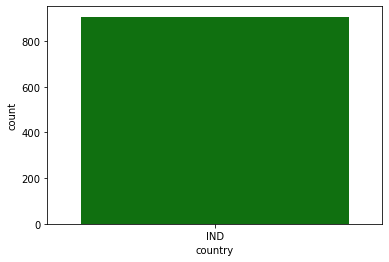

In [32]:
sns.countplot('country',data=df,color='g')

only  IND present in country column, so it's better to drop it.

<AxesSubplot:xlabel='country_long', ylabel='count'>

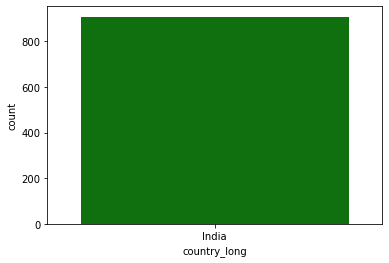

In [33]:
sns.countplot('country_long',data=df,color='g')

Country_long have only one unique value 'India'. So it is also useless.

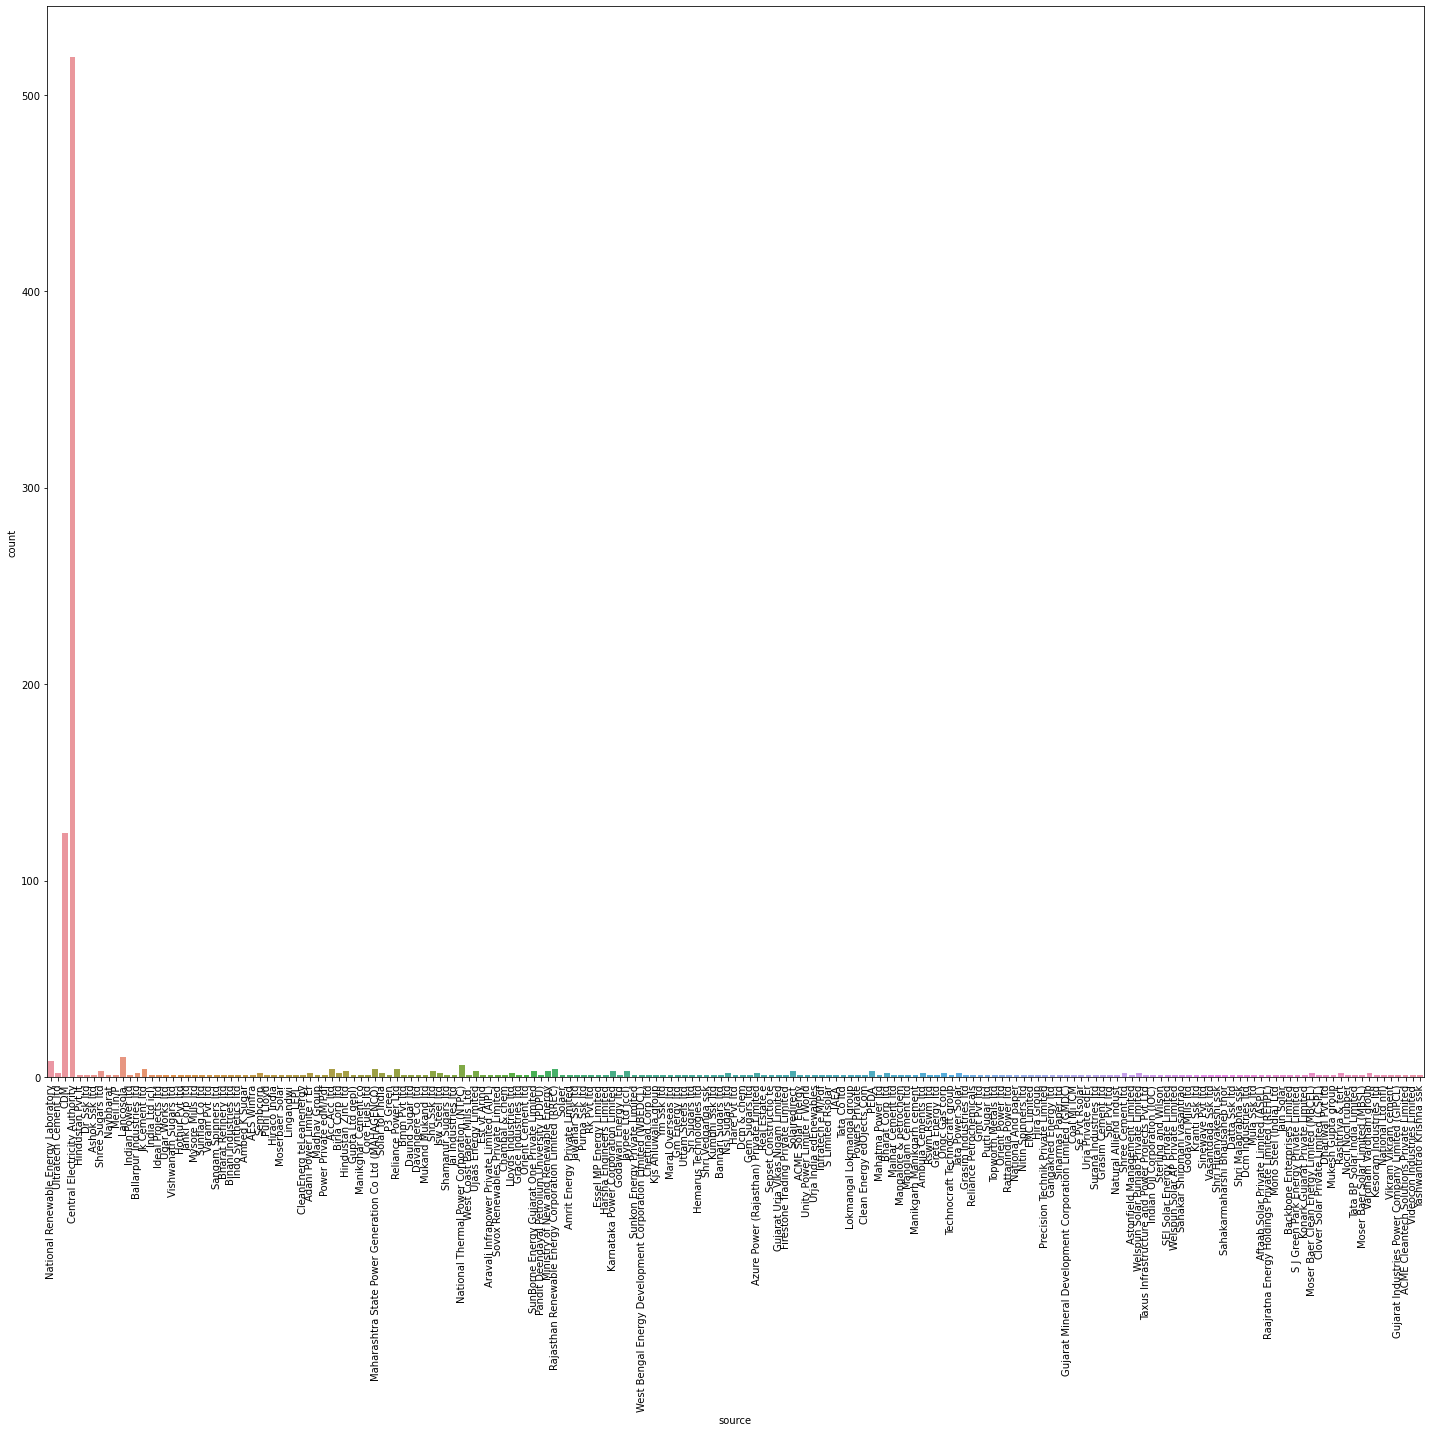

In [34]:
plt.figure(figsize=(20,20))
sns.countplot(df['source'])
plt.xticks(rotation=90)
plt.tight_layout()

Similarly `Url` and `gppd_idnu` and `name` not related with our target variable. So We are going  to drop them now.

In [35]:
df.drop(columns=['url','gppd_idnr','name','country_long','country'],inplace=True)

In [36]:
df.head()

capacity_mw primary_fuel  commissioning_year                 owner  \
0          2.5        Solar              2011.0           Solar Paces   
1         98.0         Coal              2015.0  Ultratech Cement ltd   
2         39.2         Wind              2015.0                   AES   
3        135.0          Gas              2004.0                   NaN   
4       1800.0         Coal              2015.0                   NaN   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwn2014  generation_gwn2015  generation_gwn2016  \
0           73.300229           55.538057           35.399257   
1          255.747900          227.054300          275.505077   
2          153.109836          143.986505          125.785674   
3          617.789264          843.747000          886.004428   
4         3035.550000         5916.370000         6243.000000   

   generation_gwn2017  generation_gwn2018  latitude  longitude  
0           30.881957           80.764150   28.1839    73.2407  
1          223.300426          250.213871   24.7663    74.6090  
2          143.666870          178.155171   21.9038    69.3732  
3          663.774500          626.239128   23.8712    91.3602  
4         5385.579736         7279.000000   21.9603    82.4091

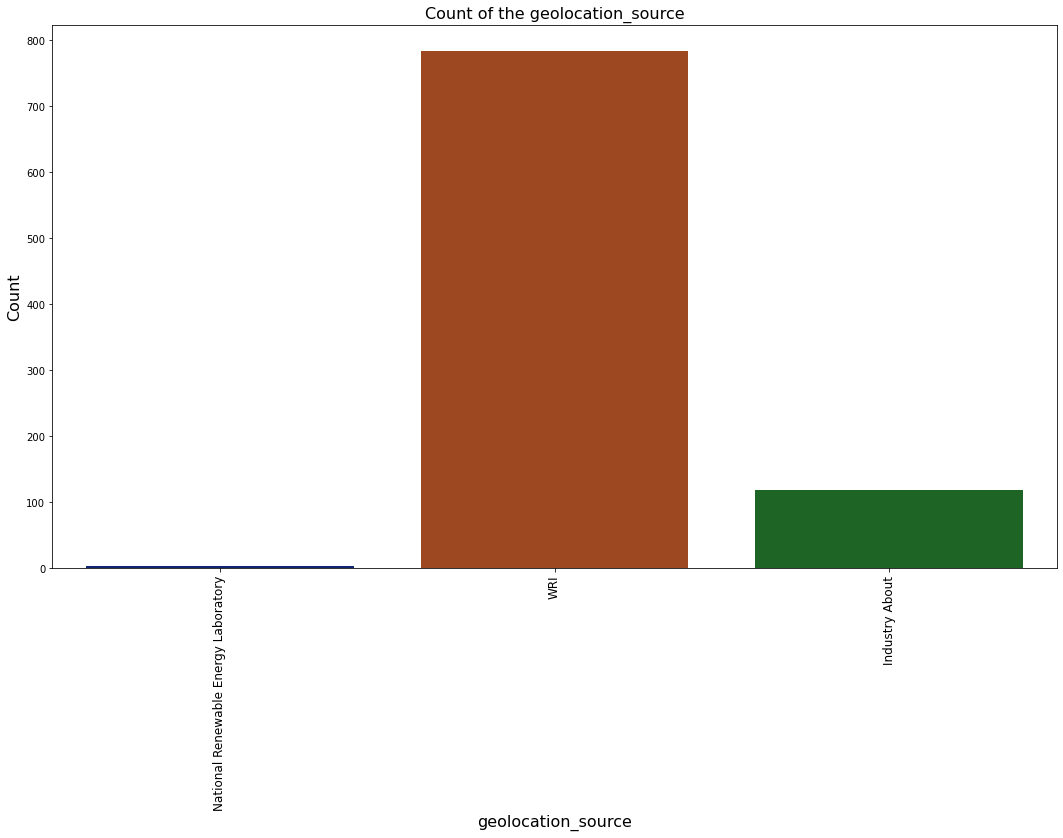

In [37]:
## geological source

plt.figure(figsize=(18,10))
ax=sns.countplot(x='geolocation_source',data=df,palette='dark')
ax.set_title(label='Count of the geolocation_source',fontsize=16)
plt.xticks(rotation=90,fontsize=12)
ax.set_xlabel('geolocation_source',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
plt.show()

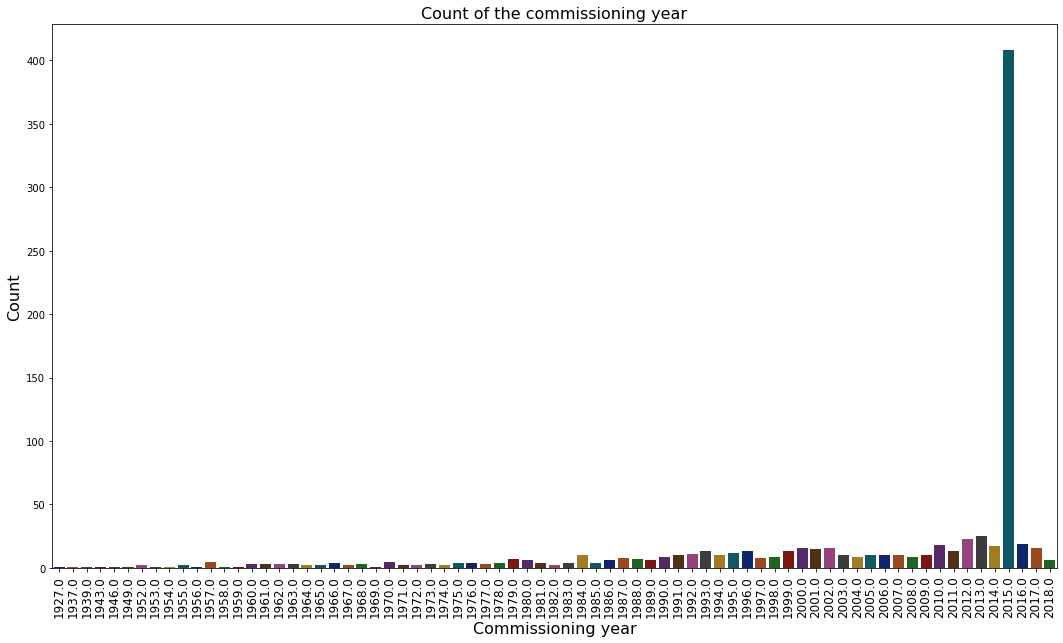

In [38]:
## commissioning_year

plt.figure(figsize=(18,10))
ax=sns.countplot(x='commissioning_year',data=df,palette='dark')
ax.set_title(label='Count of the commissioning year',fontsize=16)
plt.xticks(rotation=90,fontsize=12)
ax.set_xlabel('Commissioning year',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
plt.show()

### Observation:-
- We have collected 1927 to 2018 data.
- we can see in the above graph initially power plant start in 1927. 
- very less plant operation done during 1927 to 1956.
- and from 1957 to 2002 the number of plant operation was continously increasing, but from 2003  to 2009 it was decreasing.
- from 2010 to 2018 operation counts are increasing again.
- The hightest number of plant operation is done in 2015.


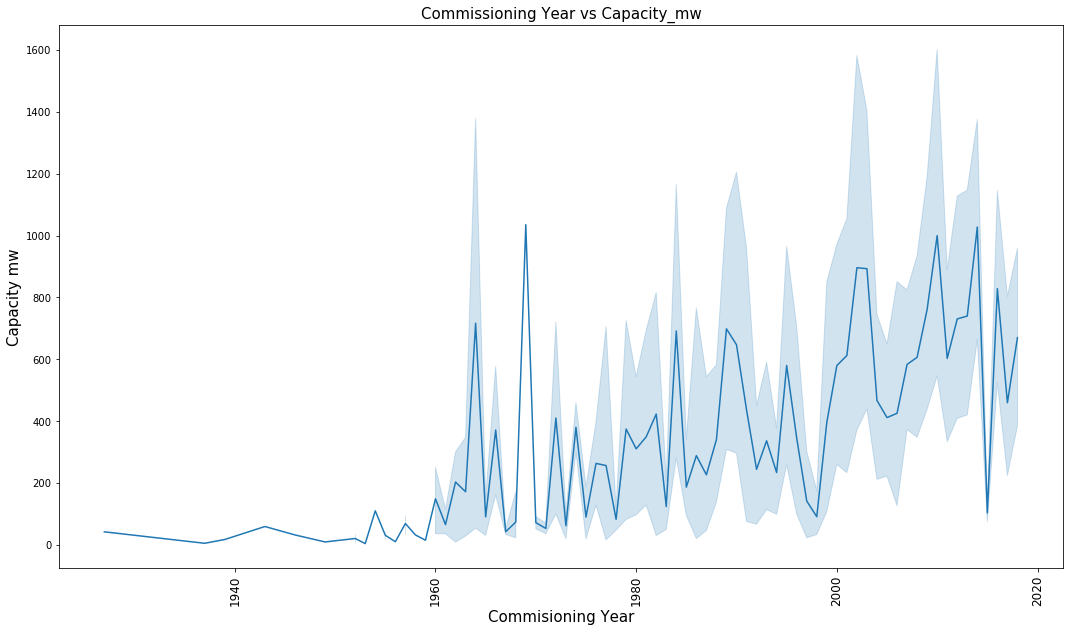

In [39]:
## Commissioning year vs capacity_mw

plt.figure(figsize=(18,10))
plt.style.use('_classic_test_patch')

sns.lineplot(x='commissioning_year',y='capacity_mw',data=df,palette='hls')
plt.title('Commissioning Year vs Capacity_mw',fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Commisioning Year',fontsize=15)
plt.ylabel('Capacity mw',fontsize=15)
plt.show()

from 1927 to 1962 it's electric generation capacity is almost zero. But after 1965 the electricity generation graph is going up and up.

Let's convert commissioning year with electrical generation capacity.

Let's convert commissioning year to commissioning age and we will minus commissioning_year from today's year.

In [40]:
df['age_of_PlantOperation']=2022-df['commissioning_year']
df.age_of_PlantOperation.value_counts()

7.0     408
9.0      25
10.0     23
6.0      19
12.0     18
       ... 
53.0      1
79.0      1
76.0      1
66.0      1
83.0      1
Name: age_of_PlantOperation, Length: 73, dtype: int64

In [41]:
## dropping the unwanted column
df.drop('commissioning_year',inplace=True,axis=1)

In [42]:
## owner
df['owner'].value_counts()

Jk Cement ltd                       4
Sterling Agro Industries ltd.       4
Acc Acc ltd                         4
SWPPL                               3
Shree Sugars ltd                    3
                                   ..
Relaxo Footwears Limited            1
Mahatma Power ltd                   1
Manikghar Cement co                 1
Precious Energy Services Pvt Ltd    1
Mysore Mills ltd                    1
Name: owner, Length: 280, dtype: int64

## Outputs
- 'ACC ACC ltd','Jk Cement ltd','sterling agro Industries lted' have highest majority shareholder of the power plant. 
- 'Shree Sugar ltd', 'Karnataka Power Corporation Limited' have second highest majority shareholder of the power plant.

As it is not effective to  keep it on our dataset so we are going drop it.

In [43]:
df.drop('owner',axis=1,inplace=True)

In [44]:
## Source

df.source.value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Hemarus Technologies ltd                       1
Jawahar Ssk ltd                                1
Meil.In/P                                      1
Solaer                                         1
Grace Industries ltd                           1
Name: source, Length: 191, dtype: int64

entity reporting the data; could be an organization, report, or document, generally in Romanized form. It will not effect any to predict our target. So we will drop it also.

In [45]:
df.drop('source',axis=1,inplace=True)

In [46]:
df.head(3)

capacity_mw primary_fuel                    geolocation_source  \
0          2.5        Solar  National Renewable Energy Laboratory   
1         98.0         Coal                                   WRI   
2         39.2         Wind                                   WRI   

   generation_gwn2014  generation_gwn2015  generation_gwn2016  \
0           73.300229           55.538057           35.399257   
1          255.747900          227.054300          275.505077   
2          153.109836          143.986505          125.785674   

   generation_gwn2017  generation_gwn2018  latitude  longitude  \
0           30.881957           80.764150   28.1839    73.2407   
1          223.300426          250.213871   24.7663    74.6090   
2          143.666870          178.155171   21.9038    69.3732   

   age_of_PlantOperation  
0                   11.0  
1                    7.0  
2                    7.0

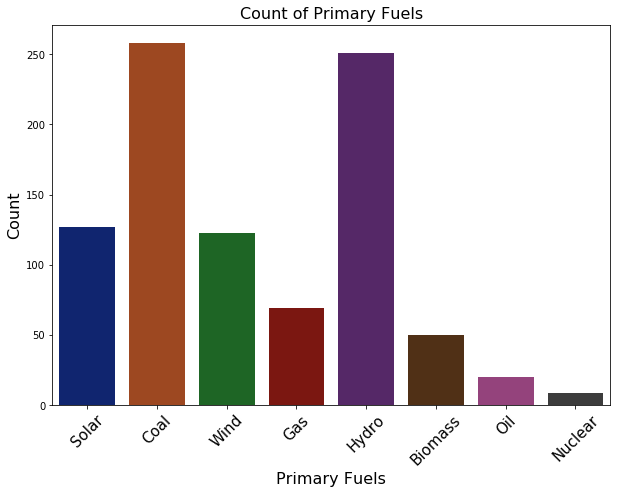

In [47]:
## Primary_fuel

plt.figure(figsize=(10,7))
ax=sns.countplot(x='primary_fuel',data=df,palette='dark')
ax.set_title(label='Count of Primary Fuels',fontsize=16)
plt.xticks(rotation=45,fontsize=15)
ax.set_xlabel('Primary Fuels',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
plt.show()

 ## outputs:
 - we can see in the above graph 'Coal' and 'Hydro' are mostly used for electricity generation in the plants.
 - 'Oil' and 'Nuclear' are rarely used for  gelectricity generation and it is obvious that oil and nuclear cost is very high  then others.

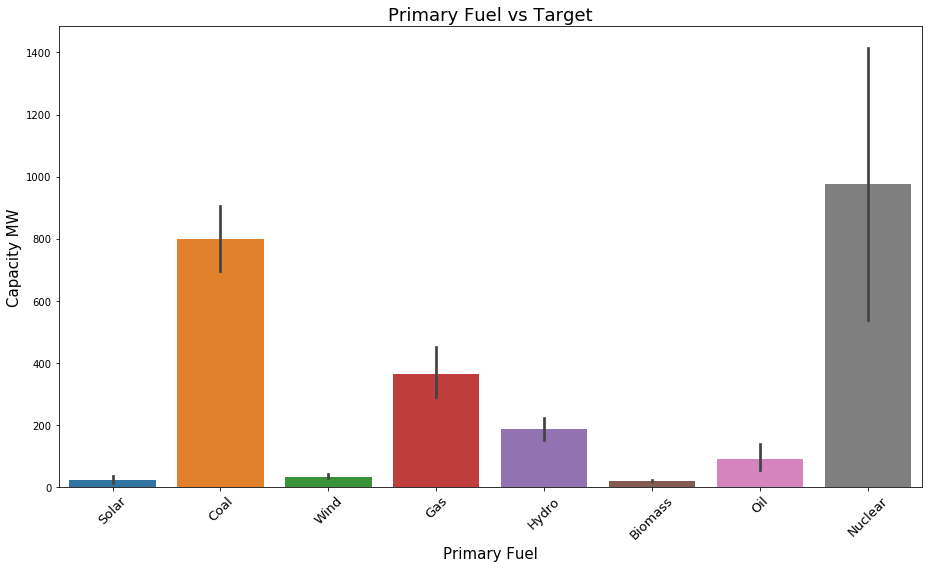

In [48]:
plt.figure(figsize=(13,8))
sns.barplot(x=df.primary_fuel,y=df.capacity_mw)
plt.xlabel('Primary Fuel',fontsize=15)
plt.ylabel('Capacity MW',fontsize=15)
plt.title('Primary Fuel vs Target',fontsize=18)
plt.xticks(rotation=45,fontsize=13)
plt.tight_layout()

## observation:-
- Though nuclear as a primary fuel very rarely used but it's capacity of electricity generation is very high.
- coal as a primary fuel second highest electricity generator it could be happen because mostly we use coal as a primary fuel.

From above graph we can encode primary fuel according it's capacity for electricity  generation.
- Biomass, wind and solar = 1
- Oil and Hydro =2
- Gas= 3
- coal =4 
- Nuclear=5



In [49]:
## replacing the primary fuel
list1=['Biomass','Wind','Solar']
list2=['Oil','Hydro']
list3=['Gas']
list4=['Coal']
list5=['Nuclear']
for i in df['primary_fuel']:
    if i in list1:
        df.primary_fuel= df['primary_fuel'].replace(i,1)
    elif i in list2:
        df.primary_fuel=df['primary_fuel'].replace(i,2)
    elif i in list3:
        df.primary_fuel=df['primary_fuel'].replace(i,3)
    elif i in list4:
        df.primary_fuel=df['primary_fuel'].replace(i,4)
    elif i in list5:
        df.primary_fuel=df['primary_fuel'].replace(i,5)
df.primary_fuel.value_counts()

1    300
2    271
4    258
3     69
5      9
Name: primary_fuel, dtype: int64

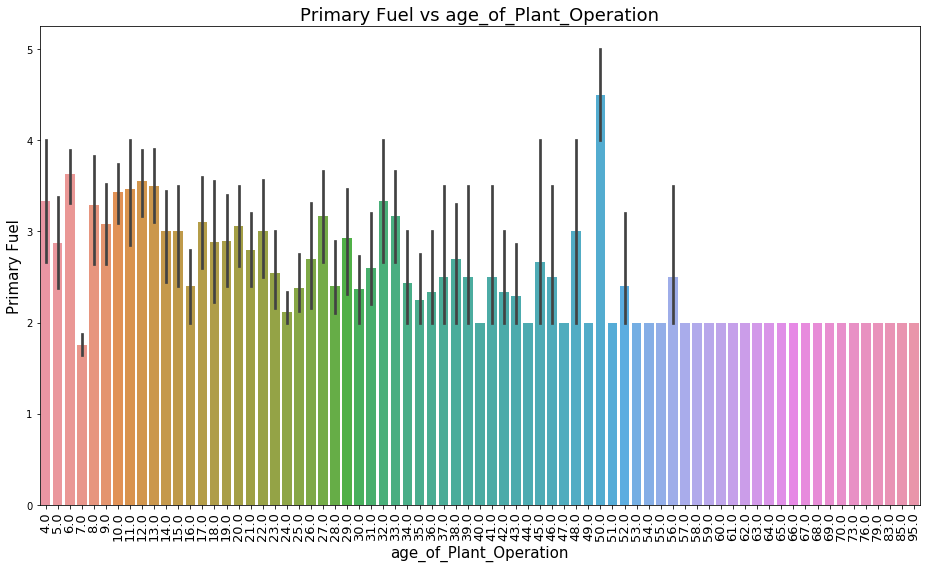

In [50]:
plt.figure(figsize=(13,8))
sns.barplot(y=df.primary_fuel,x=df.age_of_PlantOperation)
plt.ylabel('Primary Fuel',fontsize=15)
plt.xlabel('age_of_Plant_Operation',fontsize=15)
plt.title('Primary Fuel vs age_of_Plant_Operation',fontsize=18)
plt.xticks(rotation=90,fontsize=13)
plt.tight_layout()

In [51]:
df.head()

capacity_mw  primary_fuel                    geolocation_source  \
0          2.5             1  National Renewable Energy Laboratory   
1         98.0             4                                   WRI   
2         39.2             1                                   WRI   
3        135.0             3                                   WRI   
4       1800.0             4                                   WRI   

   generation_gwn2014  generation_gwn2015  generation_gwn2016  \
0           73.300229           55.538057           35.399257   
1          255.747900          227.054300          275.505077   
2          153.109836          143.986505          125.785674   
3          617.789264          843.747000          886.004428   
4         3035.550000         5916.370000         6243.000000   

   generation_gwn2017  generation_gwn2018  latitude  longitude  \
0           30.881957           80.764150   28.1839    73.2407   
1          223.300426          250.213871   24.7663    74.6090   
2          143.666870          178.155171   21.9038    69.3732   
3          663.774500          626.239128   23.8712    91.3602   
4         5385.579736         7279.000000   21.9603    82.4091   

   age_of_PlantOperation  
0                   11.0  
1                    7.0  
2                    7.0  
3                   18.0  
4                    7.0

## Continuous Data

In [52]:
## Define a function :

def plot_cont(feature):
    plt.figure(figsize=(10,7))
    sns.distplot(x=df[feature],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
    plt.xlabel(feature,fontsize=15)
    plt.ylabel('Density',fontsize=15)
    plt.title('Distribution of the Data',fontsize=18)
    plt.tight_layout()

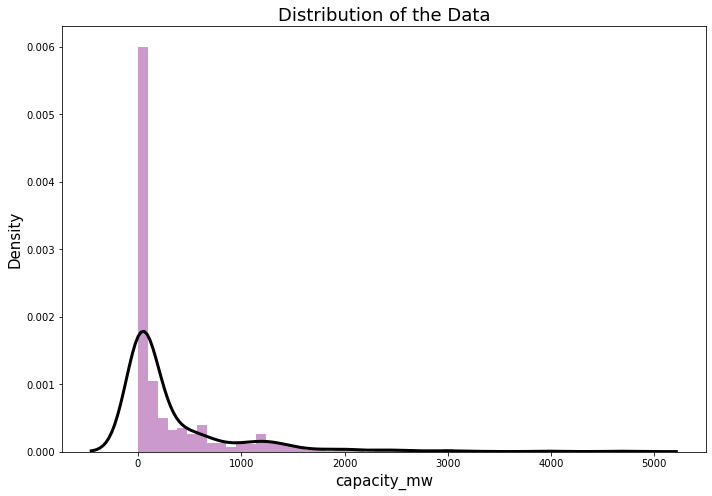

In [53]:
plot_cont('capacity_mw')

## Outputs:
- AS we see that our target variable is highly right skewed.
- maximum data point fall 0 to 600 mw.

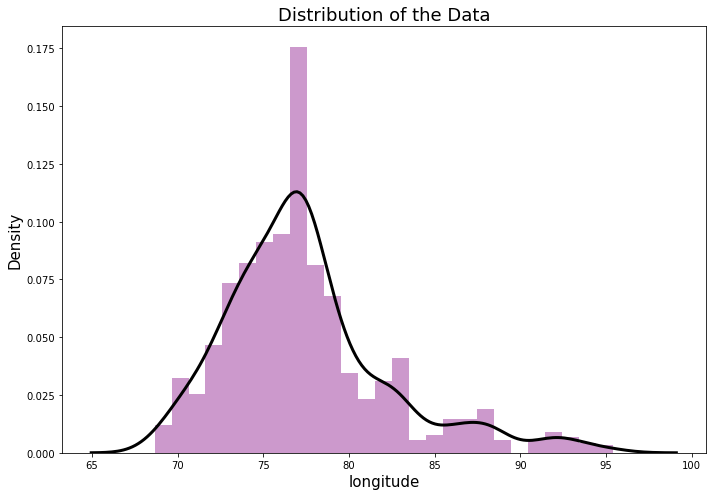

In [54]:
plot_cont('longitude')

## Outputs:
- maximum data points fall between 73 to 80.
- seems longitude is right skewed but it is less skewed then capacity_mw.
- seems longitude little bit left skewed also. We will see it later.


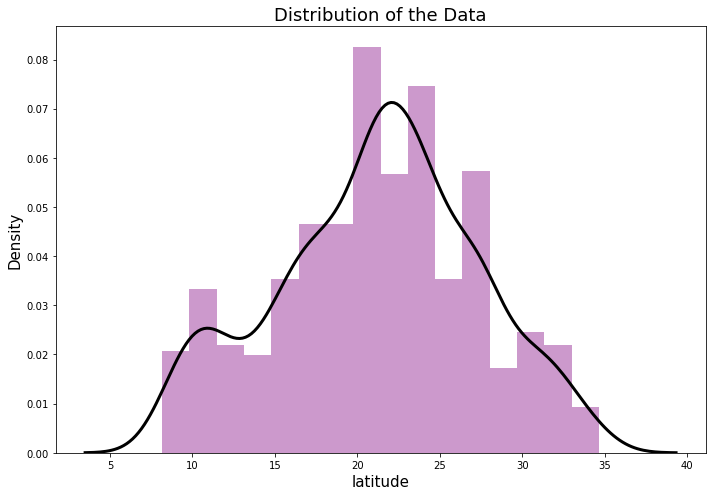

In [55]:
plot_cont('latitude')

## Outputs:
- lotitude is quite well distribute then  longitude.
- maximum data fall between 20 to 25.

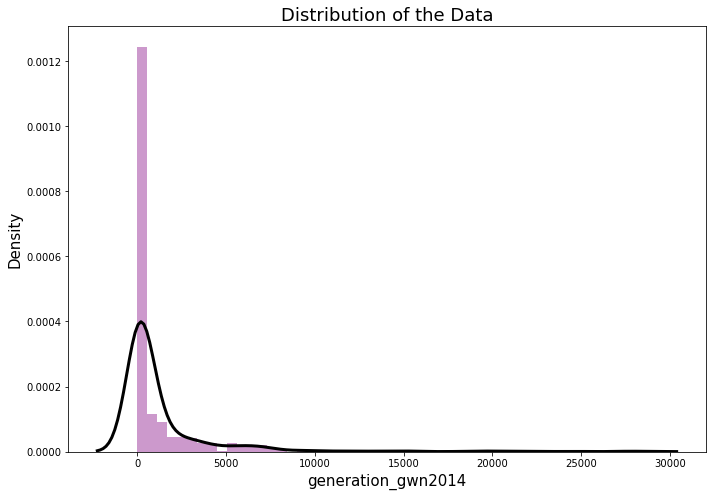

In [56]:
plot_cont('generation_gwn2014')

## Outputs:
- generation_gwh2014 is highly right skewed. May their some outliers present in our dataset. We will take care of them later.
- maximum data points fall between 0 to 2500.

In [57]:
plot_cont('generation_gwn2015')

## outputs:
- generation_gwn2015 is also highly right skewed.
- maximum data points fall between 0 to 2000.

In [58]:
plot_cont('generation_gwn2016')

# outputs:
- generation_gwn2016 is also highly right skewed.
- Most of the dataPoints fall between 0 to 3000.

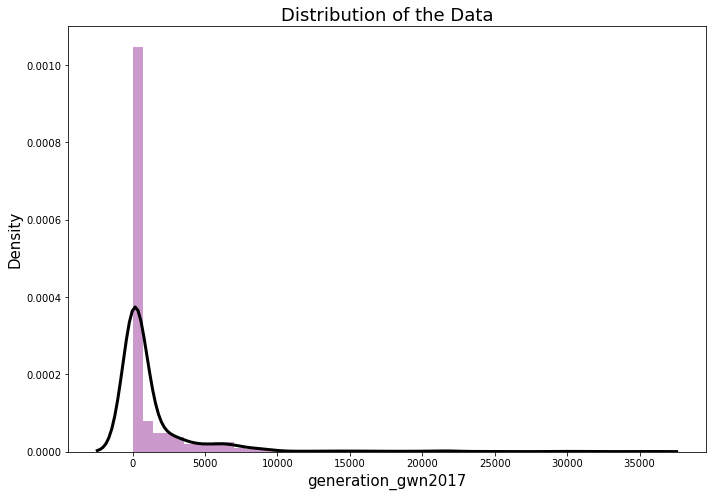

In [59]:
plot_cont('generation_gwn2017')

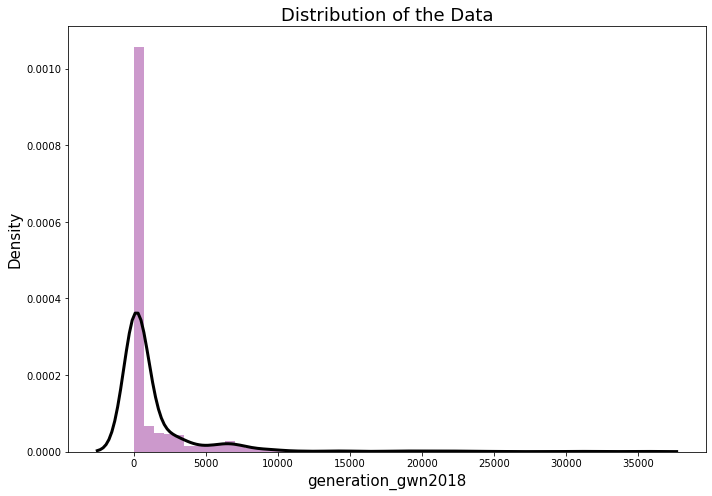

In [60]:
plot_cont('generation_gwn2018')

## Outputs:
- generation_gwh2017 and generation_gwn2018 is also highly right skewed.
- Both column's data points are zero.

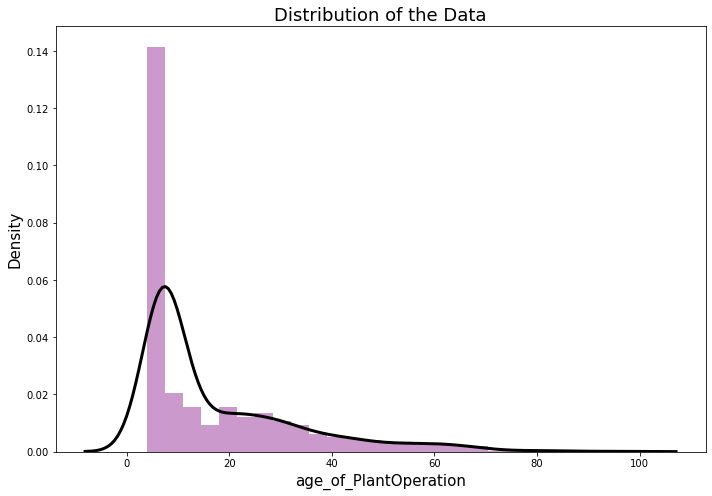

In [61]:
plot_cont('age_of_PlantOperation')

- Age is also right skewed.

## Target Vs Feature Visualization:

In [62]:
## defining a function:

def TargetVsFeature(feature,target):
    plt.figure(figsize=(18,15))
    plt.subplot(2,1,1)
    sns.lineplot(x=feature,y=target,data=df,palette='hls',color='blue')
    plt.title('Relation With Line Plot',fontsize=20)
    plt.xlabel(feature,fontsize=15)
    plt.ylabel(target,fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    
    plt.figure(figsize=(18,10))
    plt.subplot(2,1,2)
    sns.scatterplot(x=df[feature],color='purple',y=df[target])
    plt.title('Relation with Scatter plot',fontsize=23)
    plt.ylabel(feature,fontsize=15)
    plt.xlabel(target,fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
        

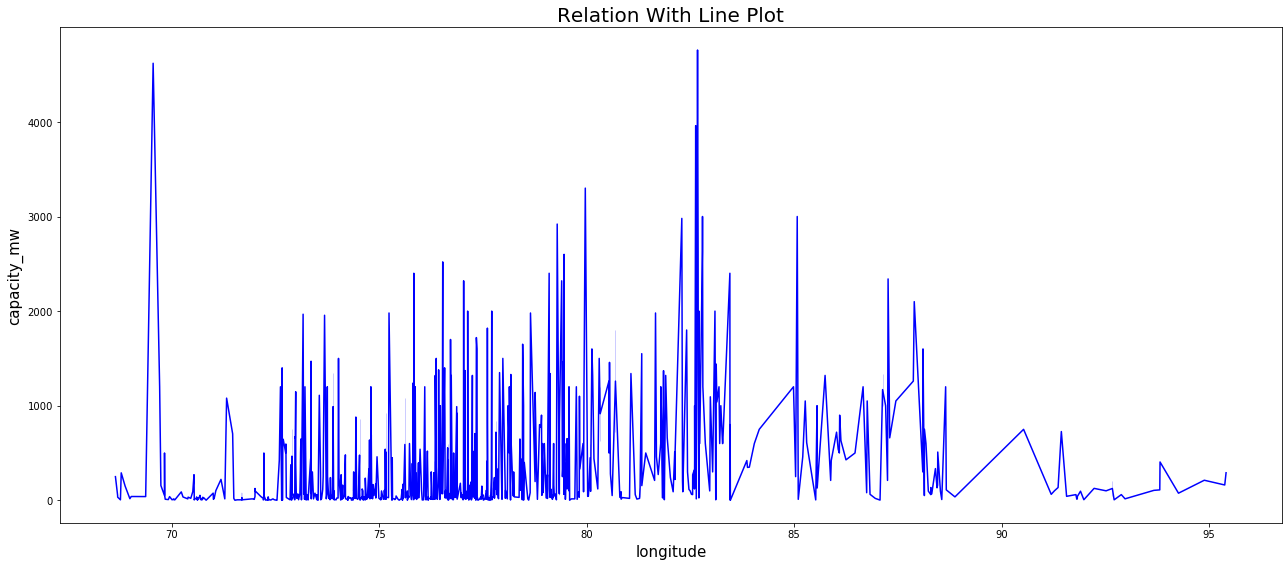

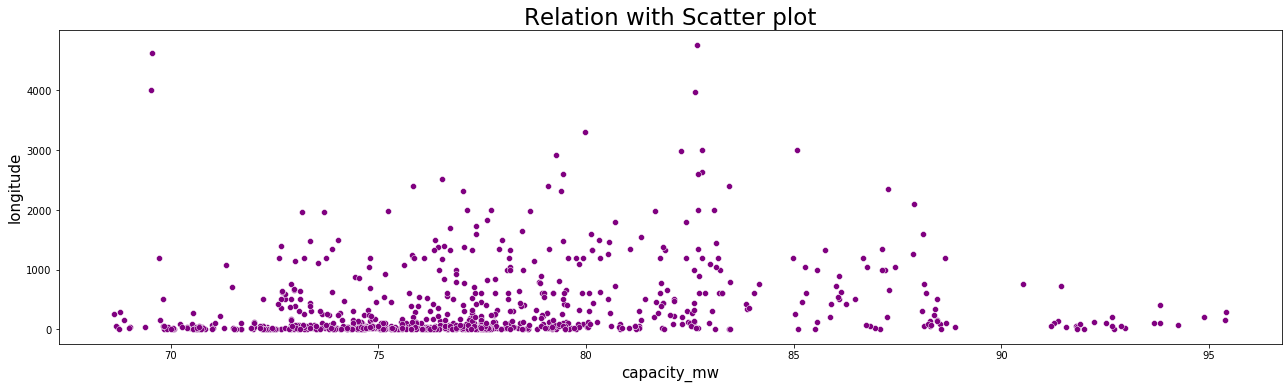

In [63]:
TargetVsFeature('longitude','capacity_mw')

## Outputs:
- In fig 1 we can see that the highest generation of electricity in MW in longitude 80 85.
- In fig 2 scatterplot, we can see that there is no relation or we can say very less relation between target vs feature.


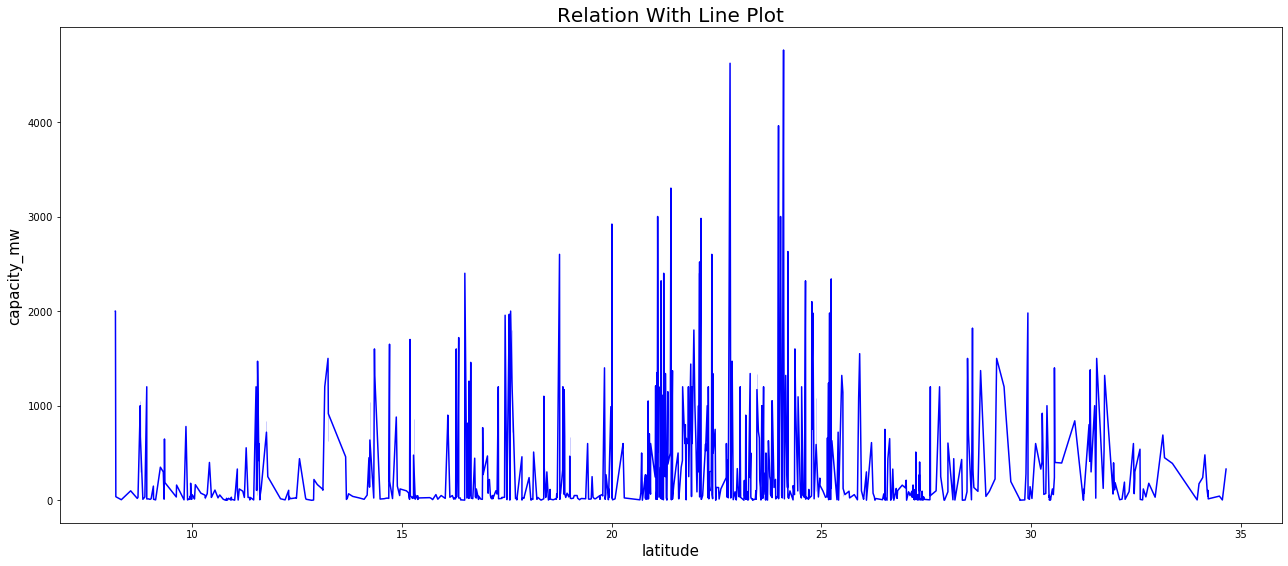

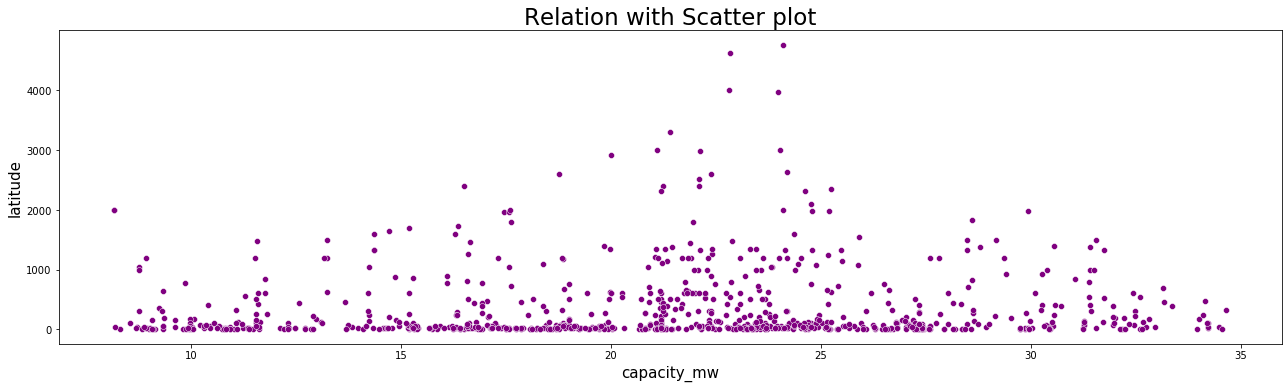

In [64]:
TargetVsFeature('latitude','capacity_mw')

## Outputs:
- In fig1 we get highest electric generation capacity in lotitude 22 to 25.
- In fig 2 we can see that there is not any trend showing target in feature, seems there is no relation or less relation between target and feature.

In [65]:
TargetVsFeature('generation_gwn2014','capacity_mw')

 ## Outputs:
 - In fig 1 we can see a good up trend beween target and feature. Initially some up and down showing, but as generation_gwh 2014 increasing the eletric generation capacity also increasing.
 - In fig 2 we see the same a up and good trend. Seems this feature and target is tightly correlated with our target variable.

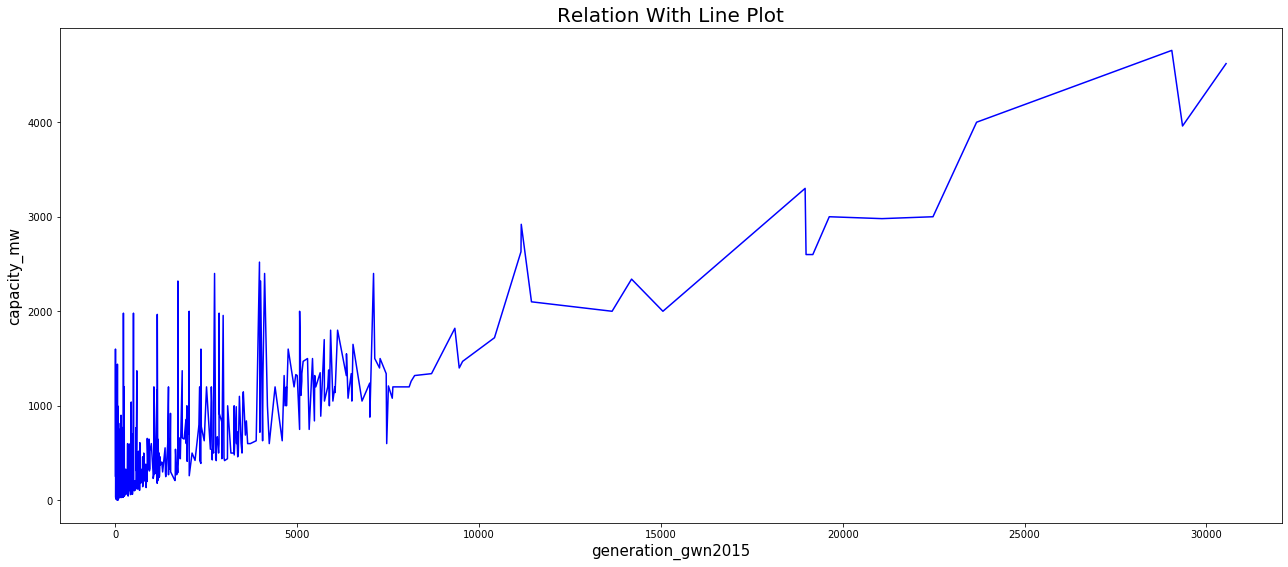

In [66]:
TargetVsFeature('generation_gwn2015','capacity_mw')

- Similarly we can see that initially some up and down showing but as generation_gwh 2014 increasing the capacity of electric generation is also increasing.

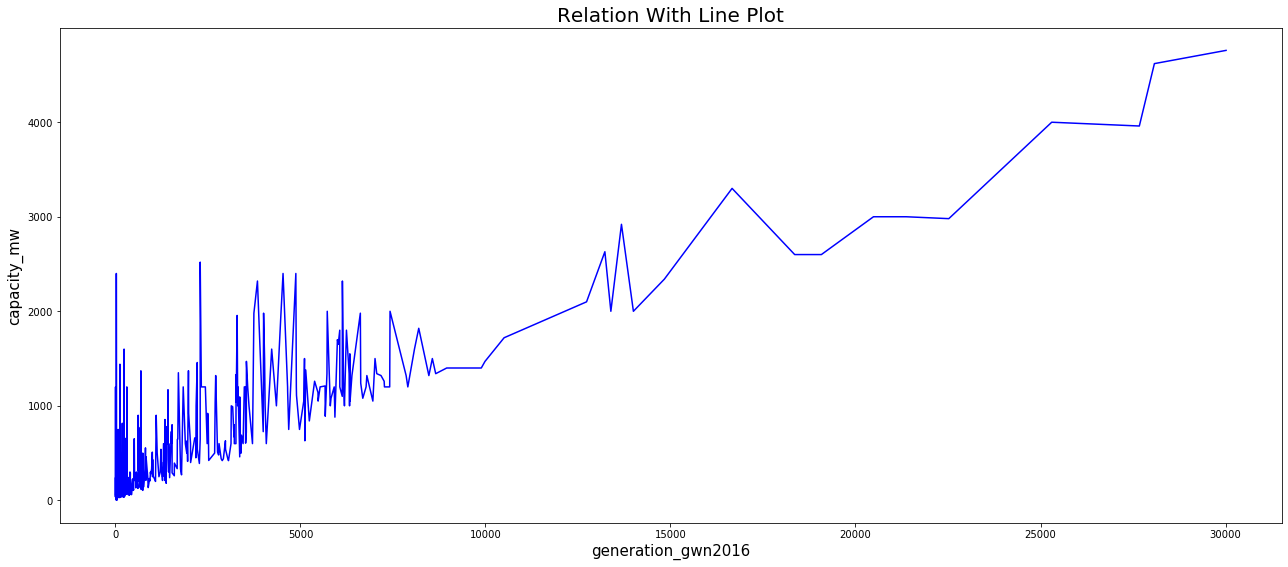

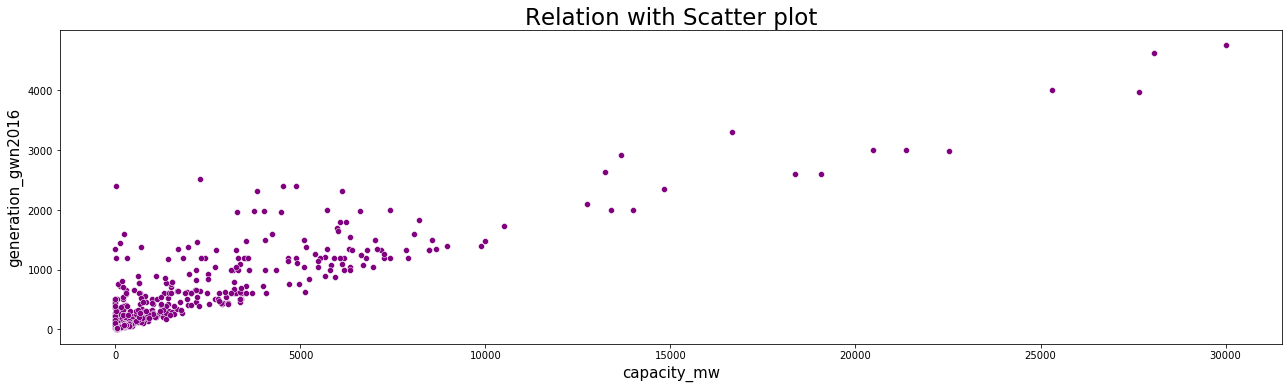

In [67]:
TargetVsFeature('generation_gwn2016','capacity_mw')

## outputs:
- As generation gwh 2016 increasing the capacity of electric generation increasing. 
- in fig 1 we can see that intially some up and down showing but after 10000 the graph goes up and up.

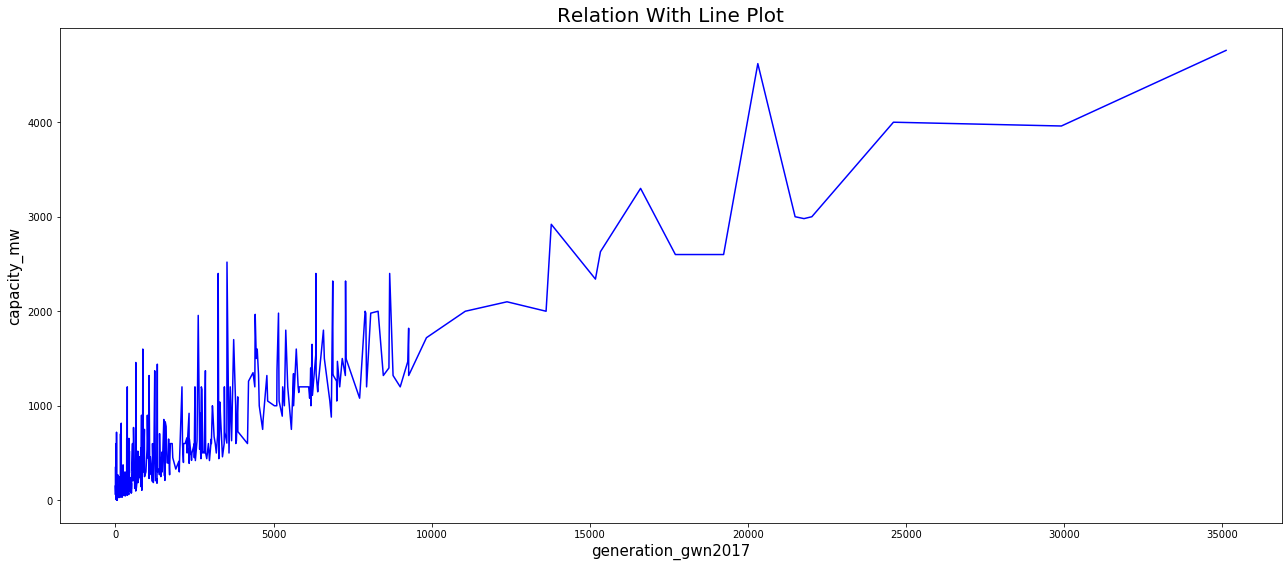

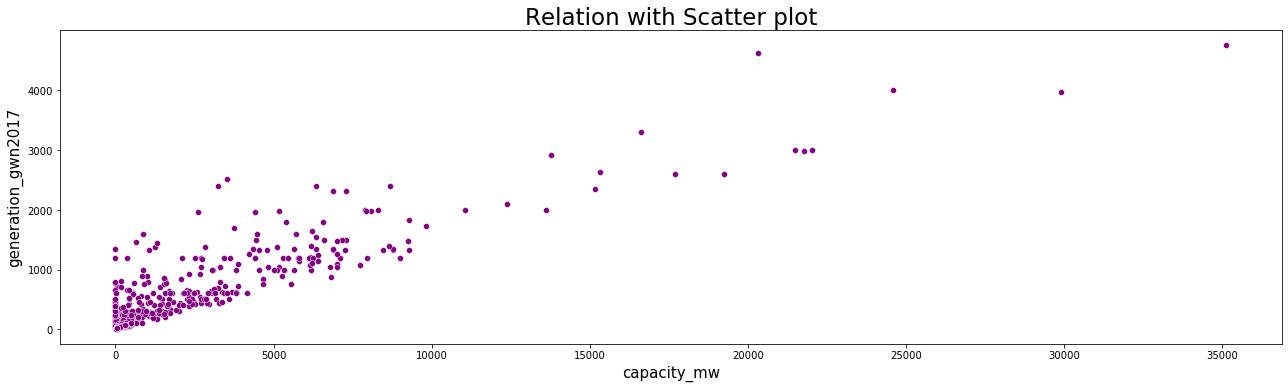

In [68]:
TargetVsFeature('generation_gwn2017','capacity_mw')

- Similarly generation gwh 2017 is also tightly correlated with target variabble.

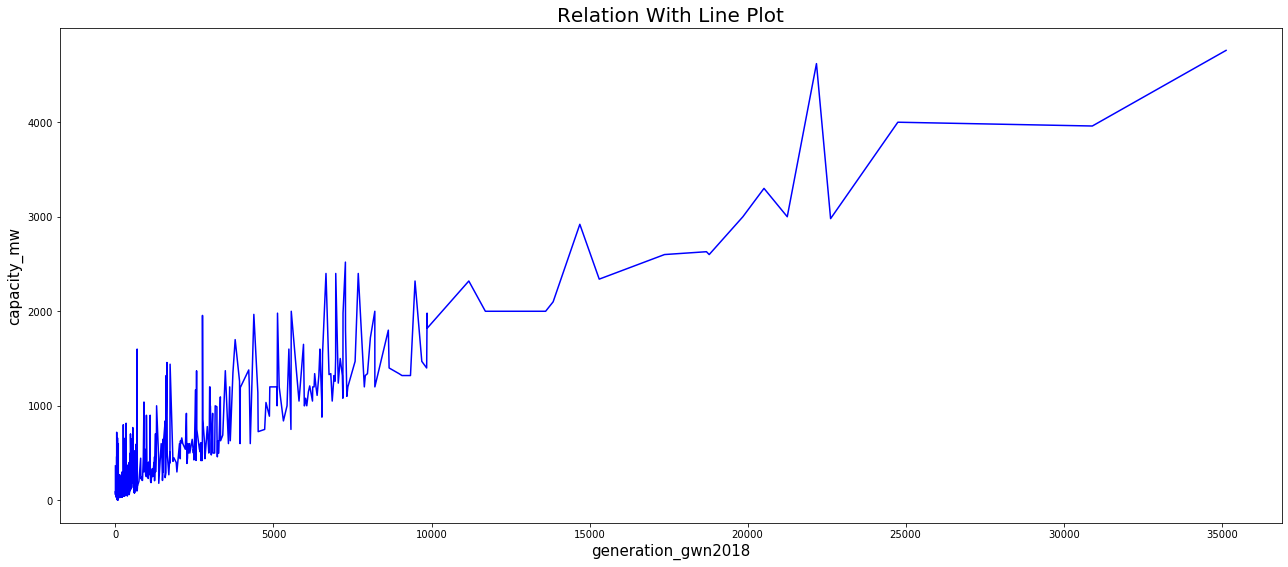

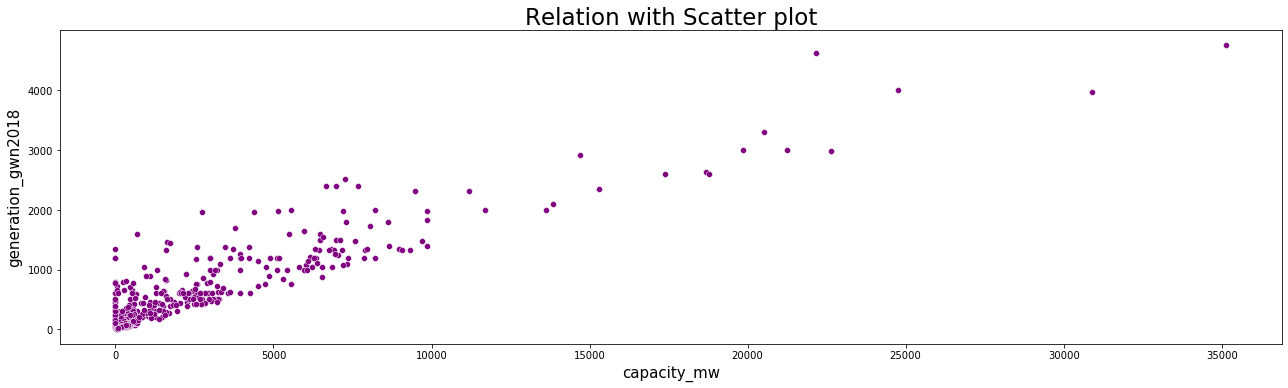

In [69]:
TargetVsFeature('generation_gwn2018','capacity_mw')

 Now we conclude that longitude and latitude are very rarely correlated with our target variable.But generation gwh 2014 to 2018 the capacity of electricity generation is increasing. There is good relation between target and feature.

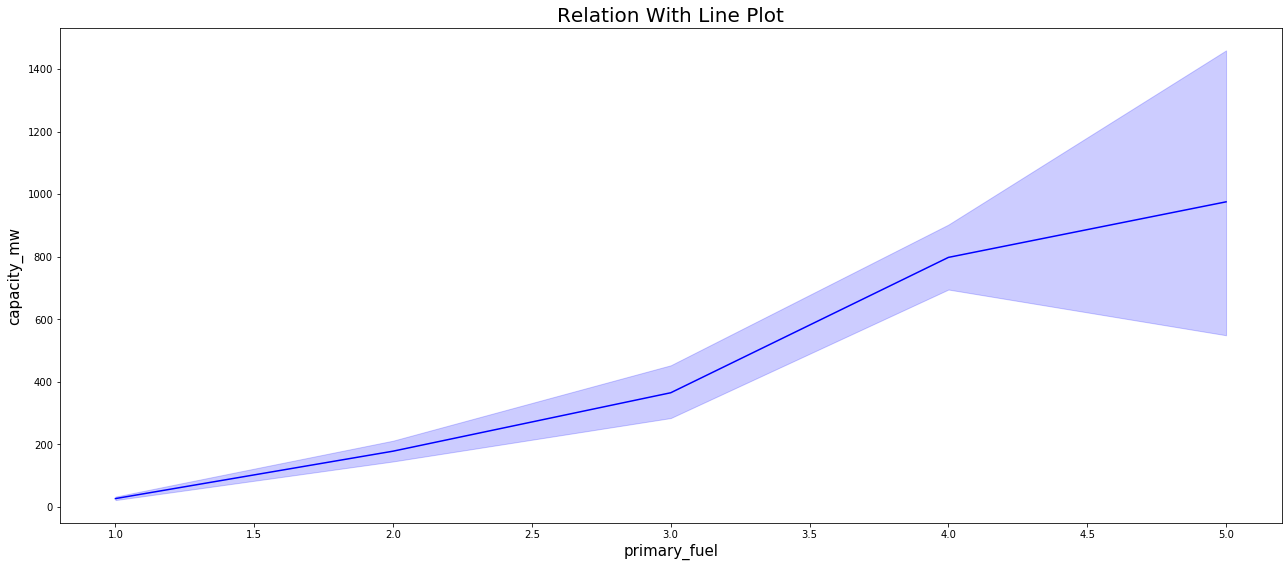

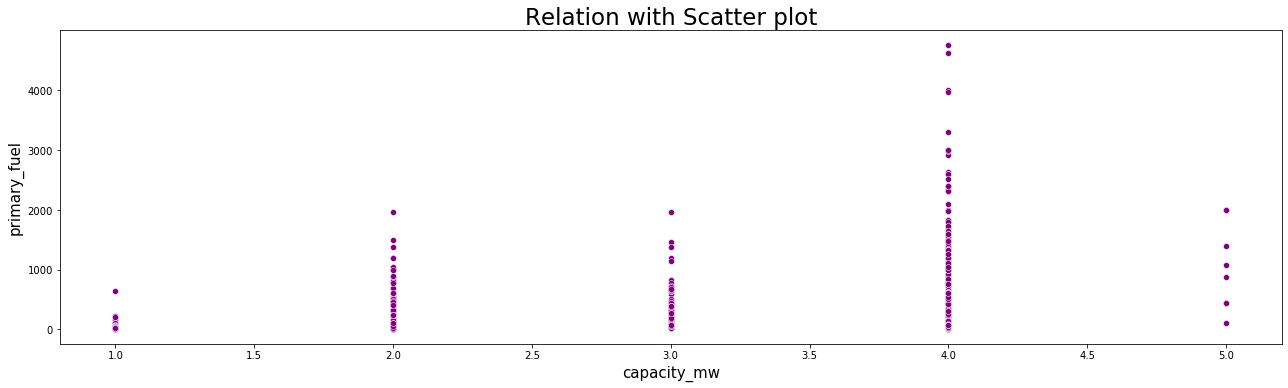

In [70]:
TargetVsFeature('primary_fuel','capacity_mw')

In [71]:
TargetVsFeature('age_of_PlantOperation','capacity_mw')

- Seems Age group is negatively correlated with target variable.

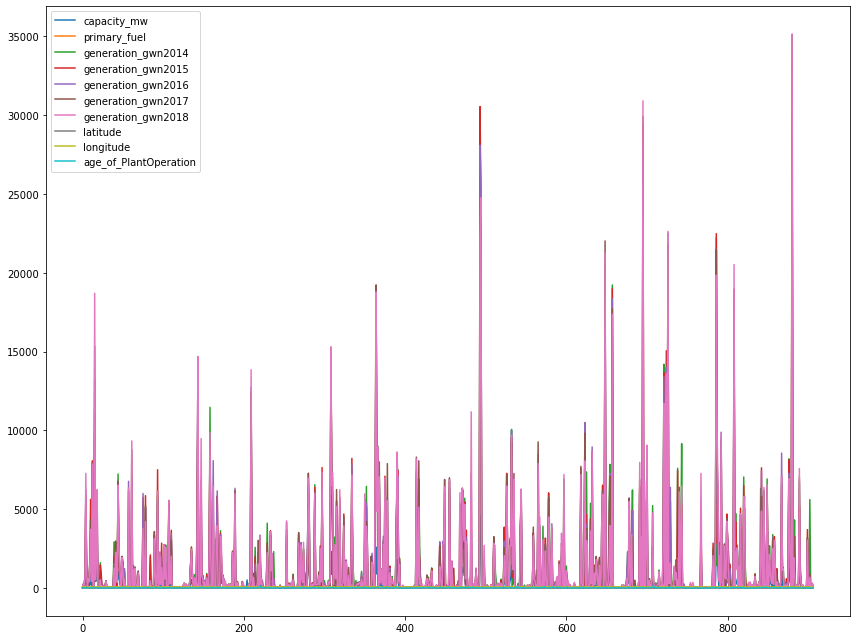

In [72]:
df.plot.line(figsize=(12,9))
plt.tight_layout()

In [73]:
### Geolocation source

plt.figure(figsize=(13,8))
sns.barplot(x=df.geolocation_source,y=df.capacity_mw)
plt.xlabel('geolocation_source',fontsize=15)
plt.ylabel('Capacity MW',fontsize=15)
plt.title('geolocation_source vs Target',fontsize=18)
plt.xticks(rotation=45,fontsize=13)
plt.tight_layout()

- Attribute WRI has highest capacity of eletricity generation.
- Industry About attributes has least capacity of  eletricity generation.

### Encoding geolocation_source
As we know our model does not understand any object data. So we have to convert it into numerical form. We will encode it with get dummies method.



In [74]:
df1=pd.get_dummies(df['geolocation_source'])
df1

Industry About  National Renewable Energy Laboratory  WRI
0                 0                                     1    0
1                 0                                     0    1
2                 0                                     0    1
3                 0                                     0    1
4                 0                                     0    1
..              ...                                   ...  ...
902               0                                     0    1
903               1                                     0    0
904               0                                     0    1
905               0                                     0    1
906               0                                     0    1

[907 rows x 3 columns]

In [75]:
df=df.join(df1)
df.drop('geolocation_source',axis=1,inplace=True)


In [76]:
df.head()

capacity_mw  primary_fuel  generation_gwn2014  generation_gwn2015  \
0          2.5             1           73.300229           55.538057   
1         98.0             4          255.747900          227.054300   
2         39.2             1          153.109836          143.986505   
3        135.0             3          617.789264          843.747000   
4       1800.0             4         3035.550000         5916.370000   

   generation_gwn2016  generation_gwn2017  generation_gwn2018  latitude  \
0           35.399257           30.881957           80.764150   28.1839   
1          275.505077          223.300426          250.213871   24.7663   
2          125.785674          143.666870          178.155171   21.9038   
3          886.004428          663.774500          626.239128   23.8712   
4         6243.000000         5385.579736         7279.000000   21.9603   

   longitude  age_of_PlantOperation  Industry About  \
0    73.2407                   11.0               0   
1    74.6090                    7.0               0   
2    69.3732                    7.0               0   
3    91.3602                   18.0               0   
4    82.4091                    7.0               0   

   National Renewable Energy Laboratory  WRI  
0                                     1    0  
1                                     0    1  
2                                     0    1  
3                                     0    1  
4                                     0    1

# Checking Outliers

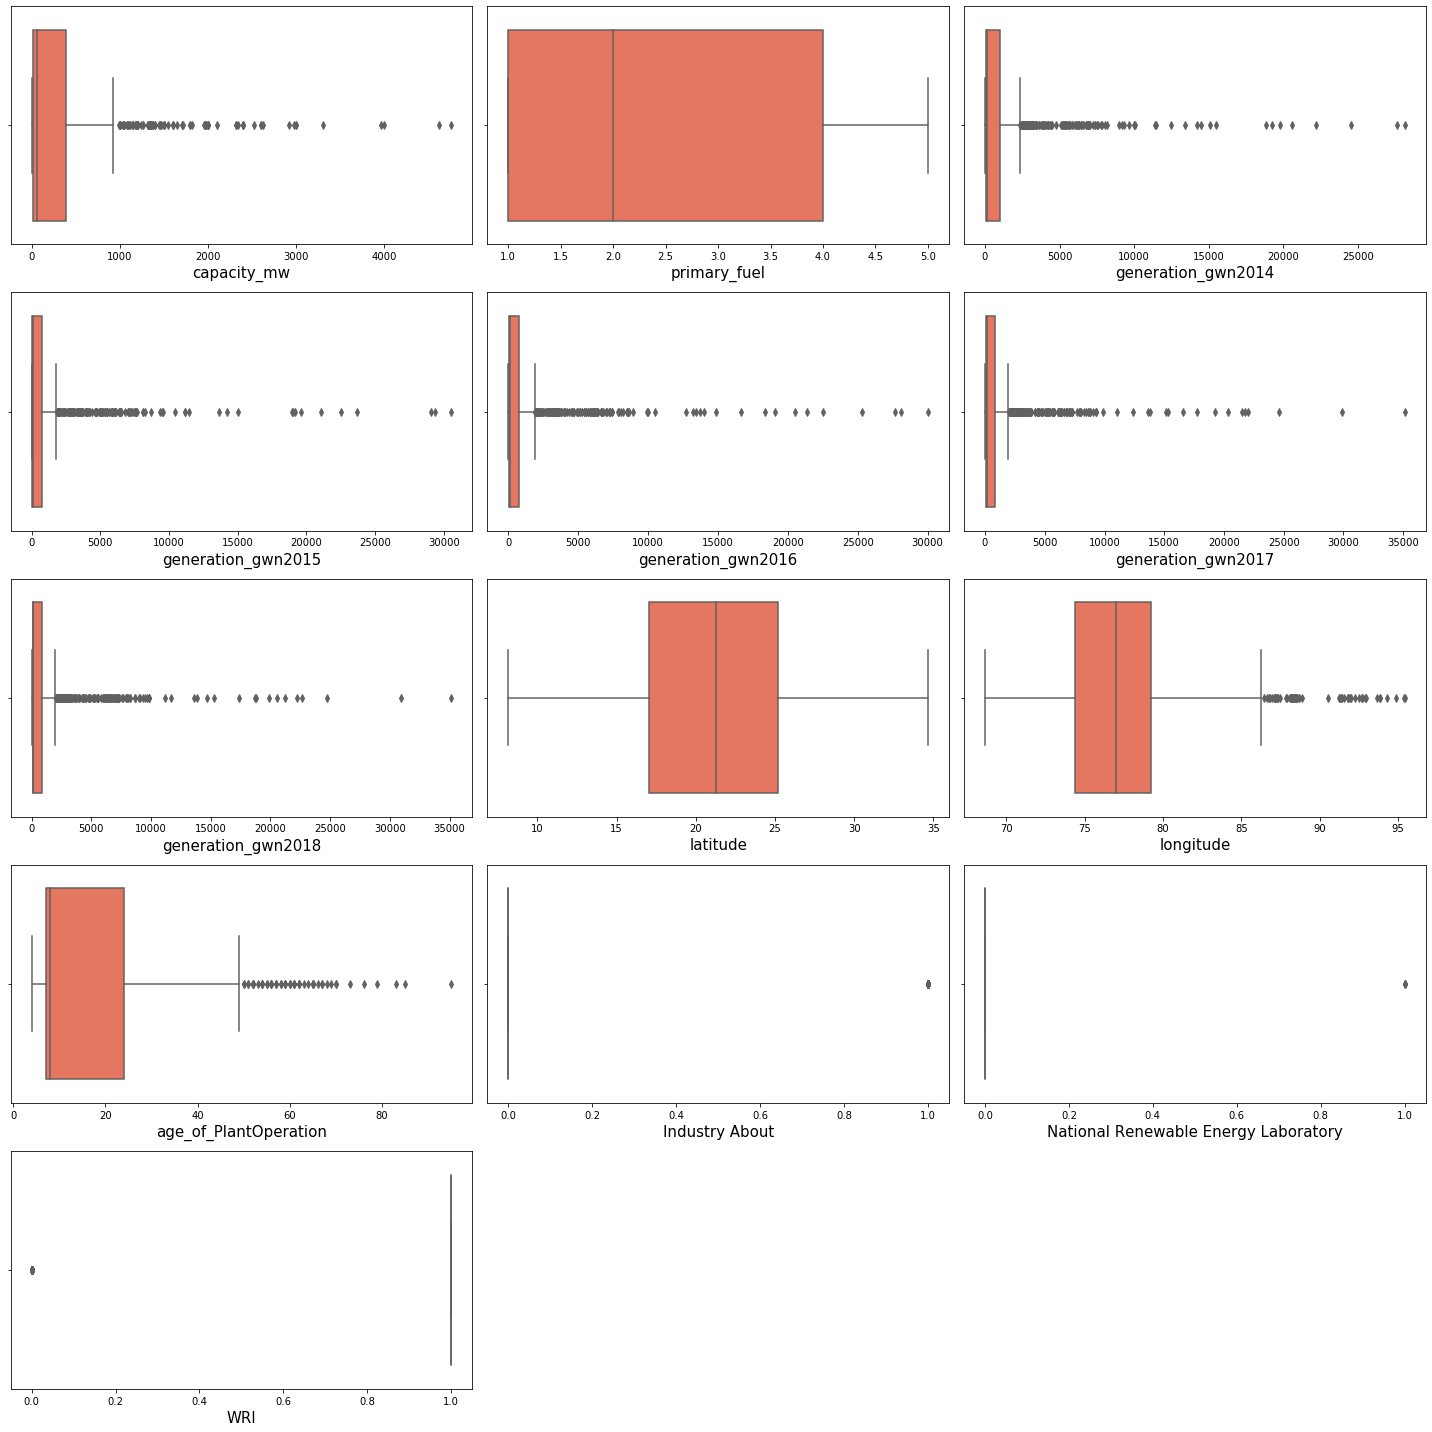

In [77]:
plt.figure(figsize=(20,20))
count=1
for i in df.columns:
    if count<=100:
        ax=plt.subplot(5,3,count)
        sns.boxplot(df[i],color='pink',palette='Reds')
        plt.xlabel(i,fontsize=15)
    count+=1
plt.tight_layout()

- There is big amount of outliers present in my dataset. let's handle them first.

## Handling Outlier using zscore
- we will remove outlier only continuous data.

first we separate them them will remove their outliers.

In [78]:
## separating the continuous data type features
list_cont=['generation_gwn2014','generation_gwn2015','generation_gwn2016','generation_gwn2017',
           'generation_gwn2018','longitude','age_of_PlantOperation']

from scipy.stats import zscore
z_score=zscore(df[list_cont])
abs_z_score=np.abs(z_score)

In [79]:
removing_outlier=(abs_z_score<3).all(axis=1)
df_new=df[removing_outlier]
print('Pervious Shape:', df.shape)
print('After removing the new shape : ',df_new.shape)

Pervious Shape: (907, 13)
After removing the new shape :  (856, 13)


## Data Loss:

In [80]:
loss=(907-856)/907*100
print('The Data Loss is : ', loss)

The Data Loss is :  5.622932745314222


 The data loss is in acceptable range. We are good to go.

# Plotting Heatmap:

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True,annot_kws={'size':15},fmt='.2f',linewidth=0.4,linecolor='red')
plt.xticks(rotation=45,fontsize=15)

plt.yticks(rotation=45,fontsize=15)
plt.tight_layout()

## Observation of Heatmap:

- All the  features are positively correlated with target variable. `generation_gwh2018`,`generation_gwh2017`and `generation_gwh_2018` are highest correated with target variable capacity_mw.
- `generation_gwh2014` is 90% correlated with ` generation_gwh2015`.
- similarly `generation_gwh2015` is 92% correlated with `generation_gwh2016`.
- `generation_gwh2016` is 94% correalted with `generation_gwh2017` and 92% correlated with `generation_gwh2018`.
- `generationn_gwh2017` is highest 97% correalated with `generation_gwn2018.
- ` latitude` and `age_of_PlantOperation` are very less correlated with target as well other features.

## Feature vs Feature

In [82]:
def FeatureVsFeature(feature1,feature2):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=df[feature1],color='red',y=df[feature2])
    plt.title('Feature VS Feature',fontsize=20)
    plt.ylabel(feature2,fontsize=15)
    plt.xlabel(feature1,fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()


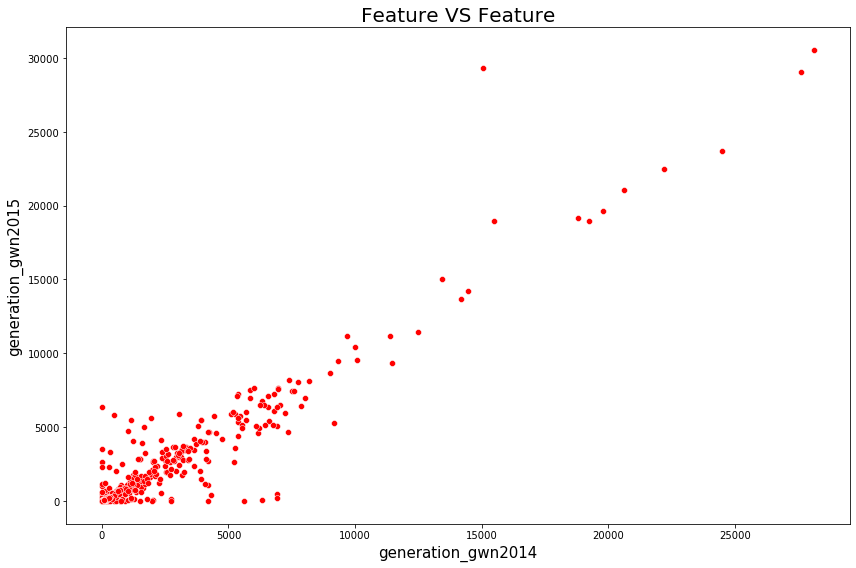

In [83]:
FeatureVsFeature('generation_gwn2014','generation_gwn2015')

- Both are highly correlated.

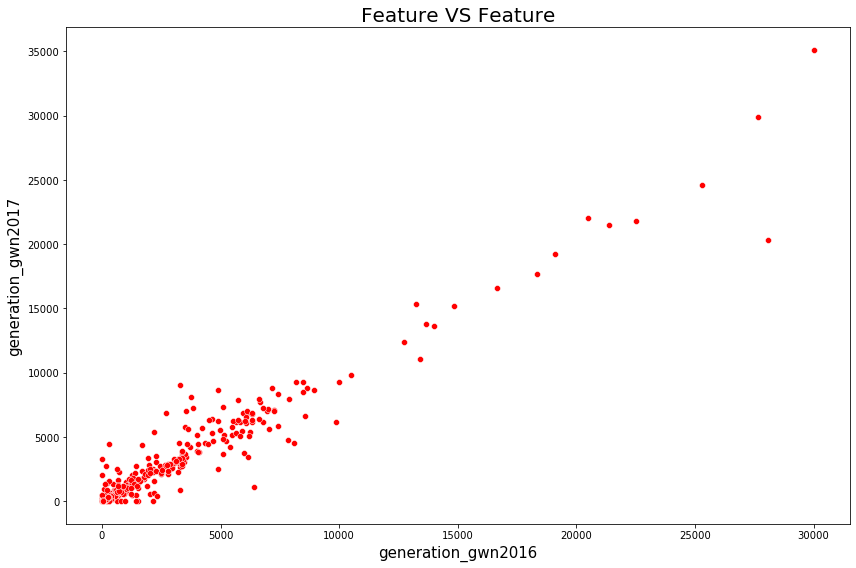

In [84]:
FeatureVsFeature('generation_gwn2016','generation_gwn2017')

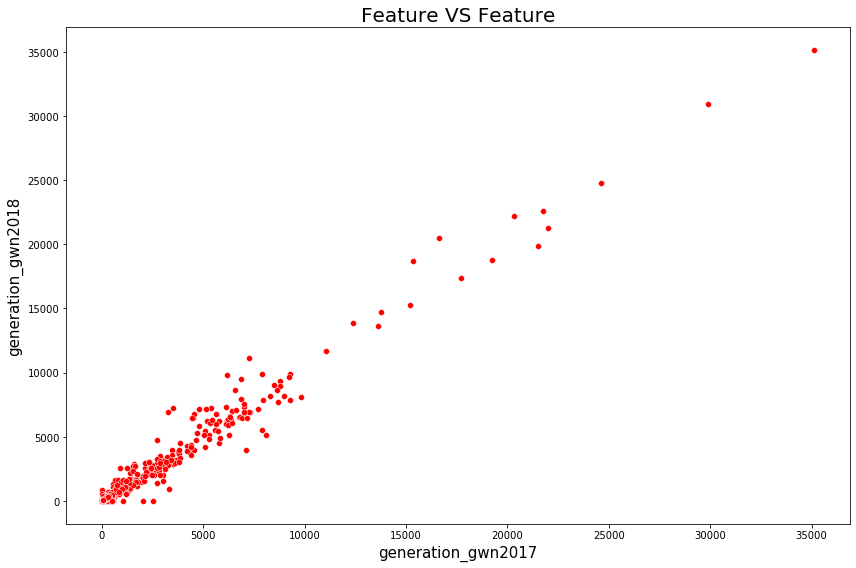

In [85]:
FeatureVsFeature('generation_gwn2017','generation_gwn2018')

In [86]:
FeatureVsFeature('latitude','longitude')

There is no relation between longitude and latitude.

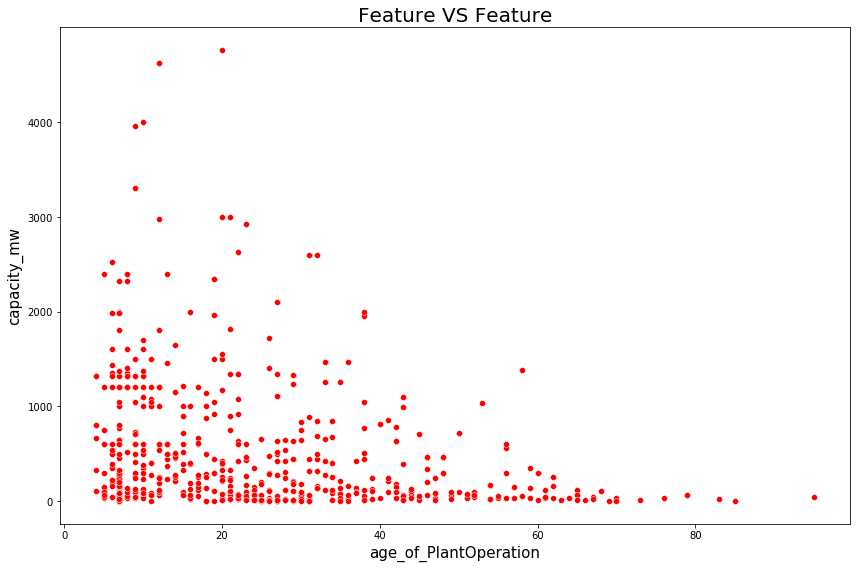

In [87]:
FeatureVsFeature('age_of_PlantOperation','capacity_mw')

There is very  less relation with target variable.

<Figure size 1080x1080 with 0 Axes>

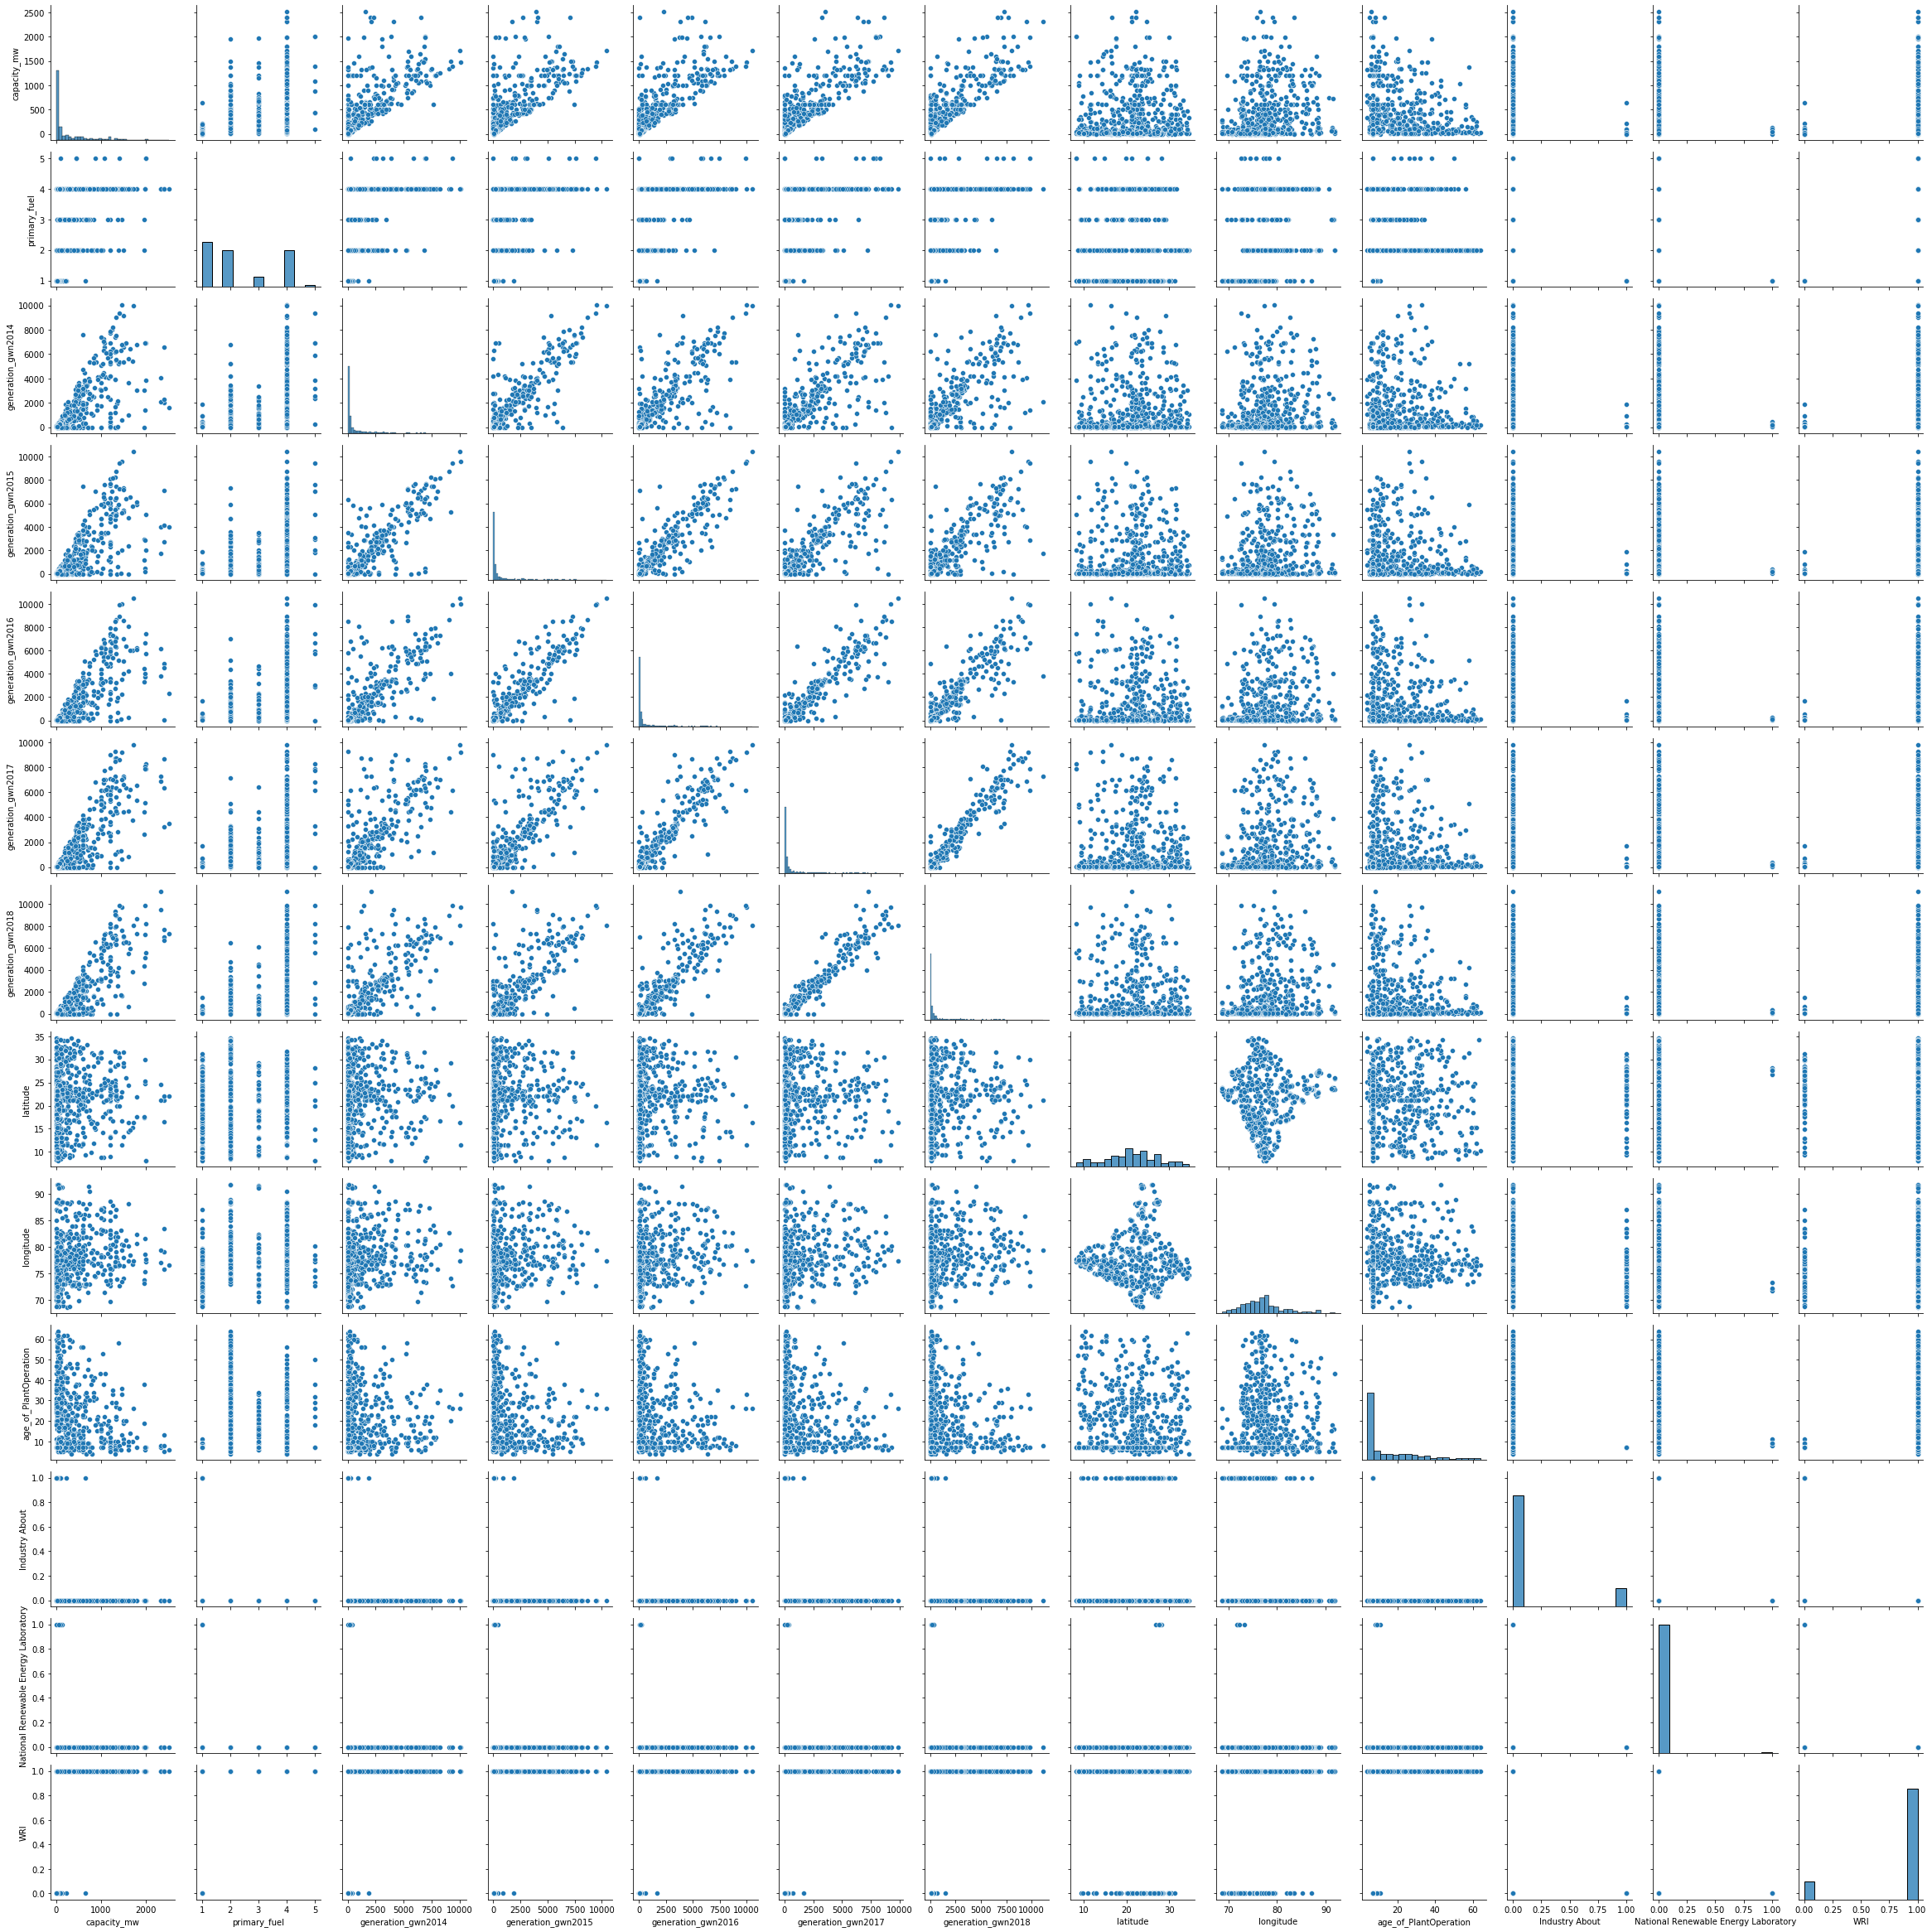

In [88]:
## pair plot
plt.figure(figsize=(15,15))
sns.pairplot(df_new,diag_kind='hist')
plt.xticks(rotation=45,fontsize=17)
plt.yticks(rotation=45,fontsize=17)
plt.tight_layout()


## Conclusion:
-  As we have seen in the heatmap that some features are highly correlated with other features. It is typically called asMulticollinearity problem.
- In pair plot we can see that some columns are showing good trend with other feature.
- As we have limited feature in the dataset. So we can not drop those features.

Let's check the correlation between target vs feature.

## Relation with target.

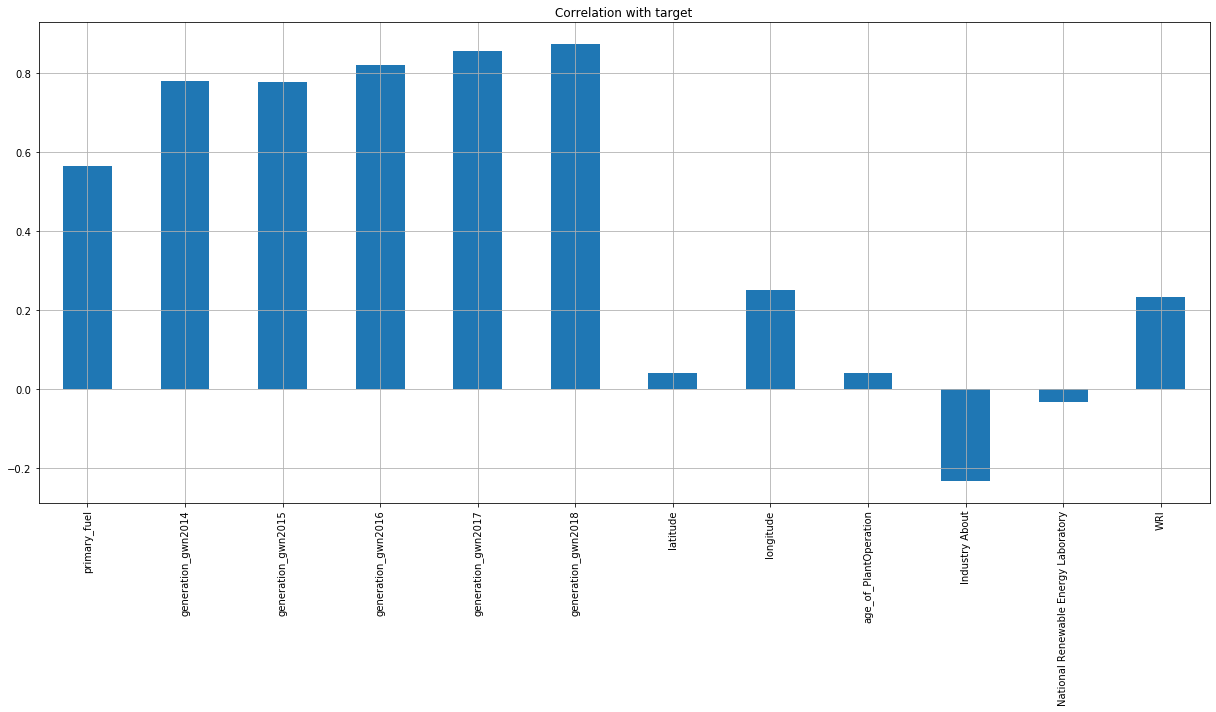

In [89]:
df_new.drop('capacity_mw',axis=1).corrwith(df_new.capacity_mw).plot(kind='bar',grid=True,figsize=(17,10),title='Correlation with target')
plt.tight_layout()

## Outputs:
- latitude and Age of plant operation features are  very less correlated with target variable.
- all generation gwh is higly correlated with target variable.
- Dropping less correlated features Latitude, Longitude,National Renewwable Enery laboratory


In [91]:
df_new.drop(columns=['longitude','latitude','National Renewable Energy Laboratory'],inplace=True)
df_new

capacity_mw  primary_fuel  generation_gwn2014  generation_gwn2015  \
0            2.5             1           73.300229           55.538057   
1           98.0             4          255.747900          227.054300   
2           39.2             1          153.109836          143.986505   
3          135.0             3          617.789264          843.747000   
4         1800.0             4         3035.550000         5916.370000   
..           ...           ...                 ...                 ...   
902       1600.0             4         5613.622000            0.994875   
903          3.0             1           66.013986           55.538057   
904         25.5             1           63.870471           41.067914   
905         80.0             4          271.806993          231.448371   
906         16.5             1           73.300229           41.067914   

     generation_gwn2016  generation_gwn2017  generation_gwn2018  \
0             35.399257           30.881957           80.764150   
1            275.505077          223.300426          250.213871   
2            125.785674          143.666870          178.155171   
3            886.004428          663.774500          626.239128   
4           6243.000000         5385.579736         7279.000000   
..                  ...                 ...                 ...   
902          233.596650          865.400000          686.500000   
903           35.399257           30.881957           64.774500   
904           29.329757           53.408757           80.764150   
905          244.408957          295.550536          323.545571   
906           29.329757           37.416264           80.764150   

     age_of_PlantOperation  Industry About  WRI  
0                     11.0               0    0  
1                      7.0               0    1  
2                      7.0               0    1  
3                     18.0               0    1  
4                      7.0               0    1  
..                     ...             ...  ...  
902                    6.0               0    1  
903                    7.0               1    0  
904                    7.0               0    1  
905                    7.0               0    1  
906                    7.0               0    1  

[856 rows x 10 columns]

## Checking Skewness.

In [92]:
df_new.skew()

capacity_mw              2.165339
primary_fuel             0.388267
generation_gwn2014       2.542426
generation_gwn2015       2.512827
generation_gwn2016       2.519936
generation_gwn2017       2.425845
generation_gwn2018       2.498094
age_of_PlantOperation    1.542463
Industry About           2.104673
WRI                     -2.048734
dtype: float64

 As we have seen in visualization our some features are highly  skewed. And we can see in above  df.skew() also.
 
 ### handling skewness.

In [93]:
feature=['generation_gwn2014','generation_gwn2015','generation_gwn2016','generation_gwn2017',
         'generation_gwn2018','age_of_PlantOperation' ]
from sklearn.preprocessing import PowerTransformer
for i in feature:
    df_new[i]=PowerTransformer().fit_transform(df_new[i].values.reshape(-1,1))
df_new.skew()
        

capacity_mw              2.165339
primary_fuel             0.388267
generation_gwn2014       0.010541
generation_gwn2015       0.000262
generation_gwn2016       0.002112
generation_gwn2017       0.000014
generation_gwn2018       0.015479
age_of_PlantOperation    0.354424
Industry About           2.104673
WRI                     -2.048734
dtype: float64

 We havve successfully removed the skewness.

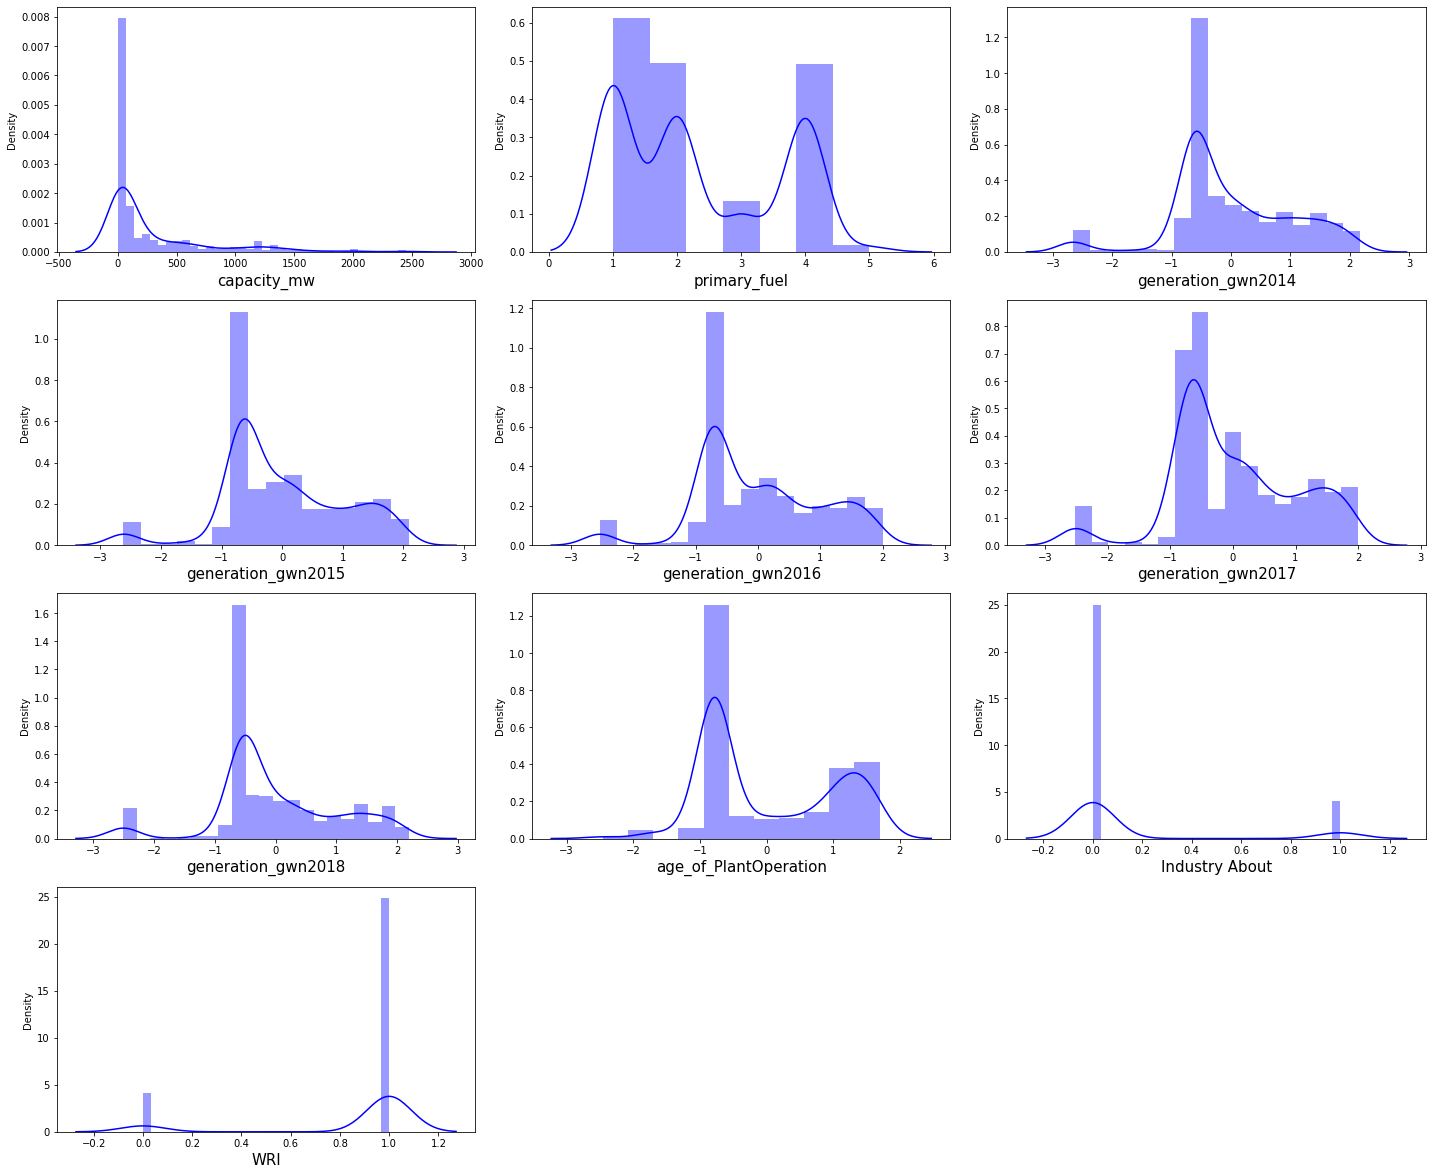

In [94]:
plt.figure(figsize=(20,20))
count=1
for i in df_new.columns:
    if count<=100:
        ax=plt.subplot(5,3,count)
        sns.distplot(df_new[i],color='blue')
        plt.xlabel(i,fontsize=15)
    count+=1
plt.tight_layout()

- We can see in the above graphs that we remove the skewness of the feature. 

### Handling Multicolinearity with PCA
when we are in a confusion  that which one feature we should keep and which one we should drop. Then comes PCA and it will take care of  multicolinearity problem.

First Scaling  the data.

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [96]:
df_new.head()

capacity_mw  primary_fuel  generation_gwn2014  generation_gwn2015  \
0          2.5             1           -0.611684           -0.581774   
1         98.0             4            0.045145            0.130445   
2         39.2             1           -0.228993           -0.101156   
3        135.0             3            0.530275            0.801609   
4       1800.0             4            1.449868            1.803772   

   generation_gwn2016  generation_gwn2017  generation_gwn2018  \
0           -0.681442           -0.825591           -0.529529   
1            0.310476            0.132224            0.040628   
2           -0.066487           -0.083297           -0.134089   
3            0.863786            0.666687            0.526922   
4            1.763418            1.698063            1.931613   

   age_of_PlantOperation  Industry About  WRI  
0               0.153164               0    0  
1              -0.782209               0    1  
2              -0.782209               0    1  
3               0.846620               0    1  
4              -0.782209               0    1

In [97]:
## splitting  target and feature
x=df_new.drop('capacity_mw',axis=1)
y=df_new['capacity_mw']
x.isna().sum()

primary_fuel             0
generation_gwn2014       0
generation_gwn2015       0
generation_gwn2016       0
generation_gwn2017       0
generation_gwn2018       0
age_of_PlantOperation    0
Industry About           0
WRI                      0
dtype: int64

In [98]:
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head()

primary_fuel  generation_gwn2014  generation_gwn2015  generation_gwn2016  \
0     -1.063730           -0.611684           -0.581774           -0.681442   
1      1.351529            0.045145            0.130445            0.310476   
2     -1.063730           -0.228993           -0.101156           -0.066487   
3      0.546443            0.530275            0.801609            0.863786   
4      1.351529            1.449868            1.803772            1.763418   

   generation_gwn2017  generation_gwn2018  age_of_PlantOperation  \
0           -0.825591           -0.529529               0.153164   
1            0.132224            0.040628              -0.782209   
2           -0.083297           -0.134089              -0.782209   
3            0.666687            0.526922               0.846620   
4            1.698063            1.931613              -0.782209   

   Industry About       WRI  
0       -0.399864 -2.452834  
1       -0.399864  0.407692  
2       -0.399864  0.407692  
3       -0.399864  0.407692  
4       -0.399864  0.407692

#### We will apply  PCA only for continuous data.

In [99]:

from sklearn.decomposition  import PCA
pca=PCA()
pca.fit_transform(x)

array([[-2.02152967,  0.83905445, -0.74493997, ...,  0.14492271,
        -0.06207103,  2.01421112],
       [ 0.72068994, -0.40968896,  1.18429806, ..., -0.0830224 ,
        -0.08115112,  0.00701183],
       [-0.50052779, -0.20274966,  0.64422343, ..., -0.08056498,
        -0.00444927, -0.01726527],
       ...,
       [-1.57024616, -0.66923881,  0.6435045 , ...,  0.03475145,
         0.08658146, -0.01214773],
       [ 0.8221094 , -0.36281978,  1.18620873, ..., -0.04953543,
         0.02233029,  0.00699993],
       [-1.61229396, -0.68534836,  0.6394808 , ...,  0.13321201,
         0.01188816, -0.01092718]])

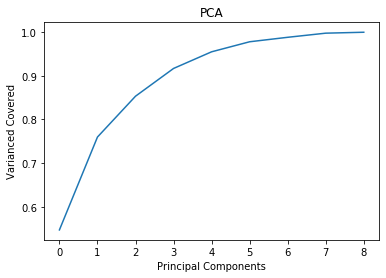

In [100]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Varianced Covered')
plt.title('PCA')
plt.show()

we can see that only 6 component is enough for telling about our dataset more then 95%.

so we will selected n_components=6

In [101]:
pca=PCA(n_components=6)
new_comp=pca.fit_transform(x)
x_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
x_comp

PC1       PC2       PC3       PC4       PC5       PC6
0   -2.021530  0.839054 -0.744940 -0.189902 -0.069280  0.044187
1    0.720690 -0.409689  1.184298  0.880157  0.082657  0.119719
2   -0.500528 -0.202750  0.644223 -1.191567 -0.151308  0.072734
3    1.820202 -0.218988 -0.530367  0.102472 -0.002248  0.252160
4    3.913543  1.009822  1.195906  0.102748  0.086387  0.147255
..        ...       ...       ...       ...       ...       ...
851  0.840434 -0.235811  1.571178  0.765445  0.639697 -2.807233
852 -2.844561  2.819410 -0.365072  0.400035 -0.051343  0.086701
853 -1.570246 -0.669239  0.643504 -0.958150 -0.010226 -0.103147
854  0.822109 -0.362820  1.186209  0.839481  0.182133  0.045968
855 -1.612294 -0.685348  0.639481 -0.930524 -0.134259 -0.127393

[856 rows x 6 columns]

In [102]:
x_comp.isna().sum()

PC1    0
PC2    0
PC3    0
PC4    0
PC5    0
PC6    0
dtype: int64

In [103]:
y.isna().sum()

0

# Model Building:

In [104]:
## importing libraries
from sklearn.model_selection import train_test_split as tts

In [105]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost  import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [106]:
## importing evaluation  metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

## Defining a function for finding a best random state.

In [107]:
## Defining a function for Finding the  best Random State.
def random_state(model,feature,target):
    mini=0
    for  i in range(0,201):
        x_train,x_test,y_train,y_test=tts(feature,target,test_size=.25,random_state=i)
        model.fit(x_train,y_train)
        pred_train=model.predict(x_train)
        pred_test=model.predict(x_test)
        mse=MSE(y_test,pred_test)
        if mse>mini:
            mini=mse
            j=i
    return j
        

## Defining A function for Evaluation:

In [108]:
def print_score(clf,X,Y):
    x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.25,random_state=random_state(clf,X,Y))
    clf.fit(x_train,y_train)
    train_pred=clf.predict(x_train)
    test_pred=clf.predict(x_test)
    train_r2=r2_score(y_train,train_pred)*100
    test_r2=r2_score(y_test,test_pred)*100
    mse=MSE(test_pred,y_test)
    mae=MAE(test_pred,y_test,)
    Rmse=np.sqrt(MSE(y_test,test_pred))
    print("\n****************************Training R2 Score***************************")
    print("\n Training Accuracy Score is : ",train_r2)
    print('\n \n')
    print("******************************Testing R2 Score****************************")
    print("\nTesting Accuracy Score is : ",test_r2)
    print("Mean Squared Error is : ", mse)
    print("Mean Absolute Error is : ", mae)
    print("Squared of Mean Squared Error is : ",Rmse)
    

## Defining a function for cross Validation:

In [109]:

from sklearn.model_selection import cross_val_score
def cross_validation(Model,independent,dependent):
    x_train,x_test,y_train,y_test=tts(independent,dependent,test_size=.25,random_state=random_state(Model,independent,dependent))
    Model.fit(x_train,y_train)
    Model.predict(x_train)
    y_pred=Model.predict(x_test)
    score=r2_score(y_test,y_pred)
    for i in range(2,21):
        cv_score=cross_val_score(Model,x_comp,y,scoring='r2',cv=i)
        print('At cv :- ', i)
        print('Cross Validation score is :- ', cv_score.mean())
        print('Testing Accuracy score is :- ',score)
        print('\n')
    

## Linear Regression:

In [110]:
### Random State
random_state(LinearRegression(),x_comp,y)

87

In [111]:
print_score(LinearRegression(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  58.650821439874726

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  52.88378154152711
Mean Squared Error is :  134246.7191753981
Mean Absolute Error is :  229.14268477234683
Squared of Mean Squared Error is :  366.39694209340513


## Cross Validation for LinearRegression

In [112]:
cross_validation(LinearRegression(),x_comp,y)

At cv :-  2
Cross Validation score is :-  0.5529236839589013
Testing Accuracy score is :-  0.5288378154152711


At cv :-  3
Cross Validation score is :-  0.5276983265841423
Testing Accuracy score is :-  0.5288378154152711


At cv :-  4
Cross Validation score is :-  0.5424815844546811
Testing Accuracy score is :-  0.5288378154152711


At cv :-  5
Cross Validation score is :-  0.5468767843874419
Testing Accuracy score is :-  0.5288378154152711


At cv :-  6
Cross Validation score is :-  0.5350797583470145
Testing Accuracy score is :-  0.5288378154152711


At cv :-  7
Cross Validation score is :-  0.5328037875844894
Testing Accuracy score is :-  0.5288378154152711


At cv :-  8
Cross Validation score is :-  0.5355675972600138
Testing Accuracy score is :-  0.5288378154152711


At cv :-  9
Cross Validation score is :-  0.5265449885993716
Testing Accuracy score is :-  0.5288378154152711


At cv :-  10
Cross Validation score is :-  0.518144689854407
Testing Accuracy score is :-  0.52883781541

## Outputs:
- We can see that for some iteration our cross validation score is higher then Testing accuracy, it is typically called as under fitted model.
- At cv=5 Our model performance is very well. cv=5 selected.

# K-Nearest Neighbors Regressor

In [113]:
## random state
random_state(KNeighborsRegressor(),x_comp,y)

182

In [114]:
print_score(KNeighborsRegressor(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  86.66737697759986

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  74.52269236223825
Mean Squared Error is :  74485.67743443775
Mean Absolute Error is :  116.0367663551402
Squared of Mean Squared Error is :  272.9206431079147


In [115]:
cross_validation(KNeighborsRegressor(),x_comp,y)

At cv :-  2
Cross Validation score is :-  0.772302321535407
Testing Accuracy score is :-  0.7452269236223825


At cv :-  3
Cross Validation score is :-  0.7690232210243971
Testing Accuracy score is :-  0.7452269236223825


At cv :-  4
Cross Validation score is :-  0.7762754047840331
Testing Accuracy score is :-  0.7452269236223825


At cv :-  5
Cross Validation score is :-  0.768058909306805
Testing Accuracy score is :-  0.7452269236223825


At cv :-  6
Cross Validation score is :-  0.7696594792516679
Testing Accuracy score is :-  0.7452269236223825


At cv :-  7
Cross Validation score is :-  0.7731160862494294
Testing Accuracy score is :-  0.7452269236223825


At cv :-  8
Cross Validation score is :-  0.7742972586310073
Testing Accuracy score is :-  0.7452269236223825


At cv :-  9
Cross Validation score is :-  0.779174907135894
Testing Accuracy score is :-  0.7452269236223825


At cv :-  10
Cross Validation score is :-  0.7716346333630248
Testing Accuracy score is :-  0.7452269236223

## Outputs:
- We can see that for some iteration our cross validation score is higher then Testing accuracy, it is typically called as under fitted model.
- At cv=15 Our model performance is very well. cv=15 selected

## DecisionTree Regressor

In [116]:
## Random State
random_state(DecisionTreeRegressor(),x_comp,y)

19

In [117]:
print_score(DecisionTreeRegressor(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  99.99935868205203

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  47.60531927534921
Mean Squared Error is :  98945.14379880062
Mean Absolute Error is :  142.58021434574528
Squared of Mean Squared Error is :  314.55547014604696


## Cross Validation for Decision Tree

In [118]:
cross_validation(DecisionTreeRegressor(),x_comp,y)

At cv :-  2
Cross Validation score is :-  0.7048275623320325
Testing Accuracy score is :-  0.5731759965608758


At cv :-  3
Cross Validation score is :-  0.6739336033414492
Testing Accuracy score is :-  0.5731759965608758


At cv :-  4
Cross Validation score is :-  0.6847714978984534
Testing Accuracy score is :-  0.5731759965608758


At cv :-  5
Cross Validation score is :-  0.6272109208277845
Testing Accuracy score is :-  0.5731759965608758


At cv :-  6
Cross Validation score is :-  0.6505928462569656
Testing Accuracy score is :-  0.5731759965608758


At cv :-  7
Cross Validation score is :-  0.6509770755517382
Testing Accuracy score is :-  0.5731759965608758


At cv :-  8
Cross Validation score is :-  0.6565966331999955
Testing Accuracy score is :-  0.5731759965608758


At cv :-  9
Cross Validation score is :-  0.6951638854791792
Testing Accuracy score is :-  0.5731759965608758


At cv :-  10
Cross Validation score is :-  0.6119645643132856
Testing Accuracy score is :-  0.5731759965

### Outputs:
- We can see that for some iteration our cross validation score is higher then Testing accuracy, it is typically called as under fitted model.
- At cv=6 Our model performance is very well. cv=6 selected

## SVR

In [119]:
## Random State
random_state(SVR(),x_comp,y)



102

In [120]:
print_score(SVR(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  0.9773349570797674

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  -11.885688508240522
Mean Squared Error is :  326047.9508427556
Mean Absolute Error is :  303.18583542860165
Squared of Mean Squared Error is :  571.006086519886


## Cross Validation for SVR

In [121]:
cross_validation(SVR(),x_comp,y)

At cv :-  2
Cross Validation score is :-  -0.0616308931580809
Testing Accuracy score is :-  -0.11885688508240522


At cv :-  3
Cross Validation score is :-  -0.007199879188974245
Testing Accuracy score is :-  -0.11885688508240522


At cv :-  4
Cross Validation score is :-  0.013057538133141255
Testing Accuracy score is :-  -0.11885688508240522


At cv :-  5
Cross Validation score is :-  0.03175452000343946
Testing Accuracy score is :-  -0.11885688508240522


At cv :-  6
Cross Validation score is :-  0.03503508718166052
Testing Accuracy score is :-  -0.11885688508240522


At cv :-  7
Cross Validation score is :-  0.036703350462192294
Testing Accuracy score is :-  -0.11885688508240522


At cv :-  8
Cross Validation score is :-  0.04618547177762841
Testing Accuracy score is :-  -0.11885688508240522


At cv :-  9
Cross Validation score is :-  0.049002945560256556
Testing Accuracy score is :-  -0.11885688508240522


At cv :-  10
Cross Validation score is :-  0.05774679359019613
Testing Accu

###  Outputs:
SVR is not giving any accuracy for this  model. May be it not understand the data. We will not consider it.

# Random Forest Regressor

In [122]:
## Random State
random_state(RandomForestRegressor(),x_comp,y)

103

In [123]:
print_score(RandomForestRegressor(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  97.98570534074143

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  70.52641198502178
Mean Squared Error is :  64546.35518935623
Mean Absolute Error is :  118.22484740430446
Squared of Mean Squared Error is :  254.05974728271346


## Corss Validation for Random Forest

In [124]:
cross_validation(RandomForestRegressor(),x_comp,y)

At cv :-  2
Cross Validation score is :-  0.7802140458832556
Testing Accuracy score is :-  0.7044970920791458


At cv :-  3
Cross Validation score is :-  0.8005538551544508
Testing Accuracy score is :-  0.7044970920791458


At cv :-  4
Cross Validation score is :-  0.8079244754711696
Testing Accuracy score is :-  0.7044970920791458


At cv :-  5
Cross Validation score is :-  0.7942455651863686
Testing Accuracy score is :-  0.7044970920791458


At cv :-  6
Cross Validation score is :-  0.8082831862160318
Testing Accuracy score is :-  0.7044970920791458


At cv :-  7
Cross Validation score is :-  0.8118012818035256
Testing Accuracy score is :-  0.7044970920791458


At cv :-  8
Cross Validation score is :-  0.803063042089057
Testing Accuracy score is :-  0.7044970920791458


At cv :-  9
Cross Validation score is :-  0.8032018717567915
Testing Accuracy score is :-  0.7044970920791458


At cv :-  10
Cross Validation score is :-  0.7881364219863118
Testing Accuracy score is :-  0.70449709207

## Outputs:
- As far now  random forest giving us the best accuracy. But we can see here our  model got under fitted.
- At CV=15 give us the best accuracy. CV=15 selected.

# Ada Boost Regressor

In [125]:
## random State
random_state(AdaBoostRegressor(),x_comp,y)

65

In [126]:
print_score(AdaBoostRegressor(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  64.93795042238126

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  52.17949397977053
Mean Squared Error is :  85214.16334375685
Mean Absolute Error is :  270.9724351104462
Squared of Mean Squared Error is :  291.9146507864188


# Cross Validation for Ada boost

In [127]:
cross_validation(AdaBoostRegressor(),x_comp,y)

At cv :-  2
Cross Validation score is :-  0.6188718191311291
Testing Accuracy score is :-  0.45660019622050585


At cv :-  3
Cross Validation score is :-  0.5698627426586728
Testing Accuracy score is :-  0.45660019622050585


At cv :-  4
Cross Validation score is :-  0.5434272943372676
Testing Accuracy score is :-  0.45660019622050585


At cv :-  5
Cross Validation score is :-  0.5281641870598672
Testing Accuracy score is :-  0.45660019622050585


At cv :-  6
Cross Validation score is :-  0.5110791364474002
Testing Accuracy score is :-  0.45660019622050585


At cv :-  7
Cross Validation score is :-  0.5274950270026552
Testing Accuracy score is :-  0.45660019622050585


At cv :-  8
Cross Validation score is :-  0.5212525751171048
Testing Accuracy score is :-  0.45660019622050585


At cv :-  9
Cross Validation score is :-  0.4877816363235422
Testing Accuracy score is :-  0.45660019622050585


At cv :-  10
Cross Validation score is :-  0.4496201682377313
Testing Accuracy score is :-  0.45

##### At CV=2 Ada boost gives best accuracy . So CV=2 selected.


## Gradient Boosting Regressor

In [128]:
## Random STate
random_state(GradientBoostingRegressor(),x_comp,y)

97

In [129]:
print_score(GradientBoostingRegressor(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  97.09636027931333

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  73.2952113659249
Mean Squared Error is :  66324.20192563401
Mean Absolute Error is :  122.35439936228958
Squared of Mean Squared Error is :  257.53485574895296


## Cross Validation For GradientBoosting

In [130]:
cross_validation(GradientBoostingRegressor(),x_comp,y)

At cv :-  2
Cross Validation score is :-  0.7822449983794756
Testing Accuracy score is :-  0.7333413523497937


At cv :-  3
Cross Validation score is :-  0.7789776696048172
Testing Accuracy score is :-  0.7333413523497937


At cv :-  4
Cross Validation score is :-  0.792715152790919
Testing Accuracy score is :-  0.7333413523497937


At cv :-  5
Cross Validation score is :-  0.772290786507584
Testing Accuracy score is :-  0.7333413523497937


At cv :-  6
Cross Validation score is :-  0.7851480777568565
Testing Accuracy score is :-  0.7333413523497937


At cv :-  7
Cross Validation score is :-  0.7830548449234384
Testing Accuracy score is :-  0.7333413523497937


At cv :-  8
Cross Validation score is :-  0.7819196151893151
Testing Accuracy score is :-  0.7333413523497937


At cv :-  9
Cross Validation score is :-  0.7757679081491106
Testing Accuracy score is :-  0.7333413523497937


At cv :-  10
Cross Validation score is :-  0.7608226282189877
Testing Accuracy score is :-  0.733341352349

- Our model  is under fitted.
- At cv= 4 we get the best performance. So cv=4 selected.

## XGB Regressor

In [131]:
## Random State
random_state(XGBRegressor(),x_comp,y)

52

In [132]:
print_score(XGBRegressor(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  99.99831379176166

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  69.12011759041927
Mean Squared Error is :  78560.98392962958
Mean Absolute Error is :  134.7705593499647
Squared of Mean Squared Error is :  280.2873238832423


## Cross Validation for XGB

In [133]:
cross_validation(XGBRegressor(),x_comp,y)

At cv :-  2
Cross Validation score is :-  0.7410628039091334
Testing Accuracy score is :-  0.6912011759041927


At cv :-  3
Cross Validation score is :-  0.7684499181009609
Testing Accuracy score is :-  0.6912011759041927


At cv :-  4
Cross Validation score is :-  0.7634790897227302
Testing Accuracy score is :-  0.6912011759041927


At cv :-  5
Cross Validation score is :-  0.7407426359488597
Testing Accuracy score is :-  0.6912011759041927


At cv :-  6
Cross Validation score is :-  0.7885664917585694
Testing Accuracy score is :-  0.6912011759041927


At cv :-  7
Cross Validation score is :-  0.7858824098450174
Testing Accuracy score is :-  0.6912011759041927


At cv :-  8
Cross Validation score is :-  0.7607586032838589
Testing Accuracy score is :-  0.6912011759041927


At cv :-  9
Cross Validation score is :-  0.7679781975900509
Testing Accuracy score is :-  0.6912011759041927


At cv :-  10
Cross Validation score is :-  0.7371455021940169
Testing Accuracy score is :-  0.6912011759

- xgboost model also under fitted.
- Cv=6 is  selected for giving best performance.

# Lasso

In [134]:
## Random State
random_state(Lasso(),x_comp,y)

87

In [135]:
print_score(Lasso(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  58.64673370263163

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  52.8427354671571
Mean Squared Error is :  134363.67042911678
Mean Absolute Error is :  229.01134432243015
Squared of Mean Squared Error is :  366.5565037332127


## Cross Validation For Lasso

In [136]:
cross_validation(Lasso(),x_comp,y)

At cv :-  2
Cross Validation score is :-  0.5538943315830169
Testing Accuracy score is :-  0.528427354671571


At cv :-  3
Cross Validation score is :-  0.5288311452856213
Testing Accuracy score is :-  0.528427354671571


At cv :-  4
Cross Validation score is :-  0.54354517610094
Testing Accuracy score is :-  0.528427354671571


At cv :-  5
Cross Validation score is :-  0.5484650095365172
Testing Accuracy score is :-  0.528427354671571


At cv :-  6
Cross Validation score is :-  0.5361492921836207
Testing Accuracy score is :-  0.528427354671571


At cv :-  7
Cross Validation score is :-  0.533948237144556
Testing Accuracy score is :-  0.528427354671571


At cv :-  8
Cross Validation score is :-  0.5367544505168691
Testing Accuracy score is :-  0.528427354671571


At cv :-  9
Cross Validation score is :-  0.527566328657294
Testing Accuracy score is :-  0.528427354671571


At cv :-  10
Cross Validation score is :-  0.5194880144625131
Testing Accuracy score is :-  0.528427354671571


At c

- Our model is underfitted model, but we still did not get much  accuracy by lasso model.
- cv=5 selected for giving best model accuracy.

## Ridge

In [137]:
## random State
random_state(Ridge(),x_comp,y)

87

In [138]:
print_score(Ridge(),x_comp,y)


****************************Training R2 Score***************************

 Training Accuracy Score is :  58.650791638087505

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  52.87630971966733
Mean Squared Error is :  134268.0083960477
Mean Absolute Error is :  229.1311062203423
Squared of Mean Squared Error is :  366.42599306824246


### Cross Validation for Ridge.

In [139]:
cross_validation(Ridge(),x_comp,y)

At cv :-  2
Cross Validation score is :-  0.5530865639089473
Testing Accuracy score is :-  0.5287630971966734


At cv :-  3
Cross Validation score is :-  0.5278615347833301
Testing Accuracy score is :-  0.5287630971966734


At cv :-  4
Cross Validation score is :-  0.5426016497468188
Testing Accuracy score is :-  0.5287630971966734


At cv :-  5
Cross Validation score is :-  0.5470020878713451
Testing Accuracy score is :-  0.5287630971966734


At cv :-  6
Cross Validation score is :-  0.5351834599912914
Testing Accuracy score is :-  0.5287630971966734


At cv :-  7
Cross Validation score is :-  0.532916112107211
Testing Accuracy score is :-  0.5287630971966734


At cv :-  8
Cross Validation score is :-  0.5356740239224547
Testing Accuracy score is :-  0.5287630971966734


At cv :-  9
Cross Validation score is :-  0.526637702673252
Testing Accuracy score is :-  0.5287630971966734


At cv :-  10
Cross Validation score is :-  0.5182595372238608
Testing Accuracy score is :-  0.528763097196

- CV=5 is selected for  giving best performance.

### `KNeighbors Regressor`,`RandomForestRegressor`,`GradientBoostingRegressor`and `XGBRegressor` give us  the  best accuracy. Let's tune the parameters for  these  model. And then we will finalized our best model.

In [140]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

## Hyper Parameter Tunning.

### Random Forest Regressor

In [144]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=103)

param={'criterion':['mse', 'absolute_error','squared_error','poisson'],
                   'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[100,200,300],
                   'min_samples_split':[1,2]}

In [147]:
gcv=RandomizedSearchCV(RandomForestRegressor(),param,cv=15)


In [152]:
gcv.fit(x_train,y_train)

RandomizedSearchCV(cv=15, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'absolute_error',
                                                      'squared_error',
                                                      'poisson'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [1, 2],
                                        'n_estimators': [100, 200, 300]})

In [153]:
print(gcv.best_params_)


{'n_estimators': 300, 'min_samples_split': 2, 'max_features': 'auto', 'criterion': 'absolute_error'}


In [171]:
rf=RandomForestRegressor(min_samples_split=2,max_features='sqrt',n_estimators=200,criterion='poisson')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
score=r2_score(y_test,pred)
print('R2 Score for  random forest is : ', score)

R2 Score for  random forest is :  0.7765573972124347


In [158]:
## plotting graph
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('Random Forest Model prediction')

Text(0.5, 1.0, 'Random Forest Model prediction')

## XGBoost

In [159]:
x_train,x_test,y_train,y_test=tts(x_comp,y, test_size=0.25,random_state=52)
grid_param={'learning_rate':[0.0001,0.001,0.01,0.1,1],
           'max_depth':list(range(3,8)),
           'min_child_weight':[3,5,7,9],
           'gamma':[0.1,0.001,0.2,0.3,0.4,0.5,0.6,0.7],
           'colsample_bytree':[0.3,0.5,0.7]}

In [160]:
Gcv=RandomizedSearchCV(XGBRegressor(),grid_param,cv=6)
Gcv.fit(x_train,y_train)

RandomizedSearchCV(cv=6,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [172]:
Gcv.best_params_

{'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [173]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=3,min_child_weight=7,gamma=0.4,colsample_bytree=0.7)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
r2score=r2_score(y_test,y_pred)
print('XGB R2 Score  is : ', r2score)

XGB R2 Score  is :  0.7636359685491882


In [174]:
## plotting graph
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('XGBoost Model prediction')

Text(0.5, 1.0, 'XGBoost Model prediction')

## K-Neighbors Regressor

In [175]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=36)
param={'algorithm':['kd_tree','brute'],
      'leaf_size':list(range(1,6)),
      'n_neighbors':[3,5,7,9]}

In [176]:
grid_search=GridSearchCV(KNeighborsRegressor(),param,cv=15)


In [177]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5],
                         'n_neighbors': [3, 5, 7, 9]})

In [178]:
grid_search.best_params_

{'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 7}

In [179]:
knn=KNeighborsRegressor(algorithm='brute',leaf_size=1,n_neighbors=7)
knn.fit(x_train,y_train)
knn.predict(x_train)
pred_test=knn.predict(x_test)
R2Score=r2_score(y_test,pred_test)
print('R2 Score of KNN model  is : ',R2Score)

R2 Score of KNN model  is :  0.7451368904214037


Text(0.5, 1.0, 'KNN Model prediction')

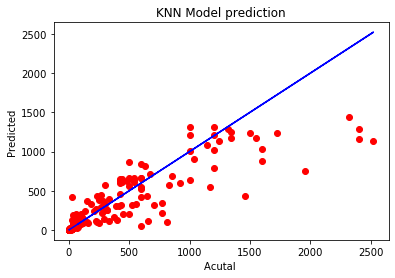

In [180]:
## plotting graph
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('KNN Model prediction')

## Gradient_Boosting Regressor

In [184]:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=97)
param={'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
      'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'max_features' : ['auto', 'sqrt', 'log2'],
      'learning_rate':[0.0001,0.001,0.01,0.1,1],}

In [185]:
GCV=GridSearchCV(GradientBoostingRegressor(),param,cv=4)

In [186]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [187]:
GCV.best_params_

{'criterion': 'mae',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_features': 'auto'}

In [188]:
gbr=GradientBoostingRegressor(criterion='mae',loss='squared_error',max_features='auto',learning_rate=0.1)
gbr.fit(x_train,y_train)
gbr.predict(x_train)
prediction=gbr.predict(x_test)
print('Gradient Boosting Regressor r 2 score is : ', r2_score(y_test,prediction))

Gradient Boosting Regressor r 2 score is :  0.7643698369242484


In [189]:
## plotting graph
plt.scatter(x=y_test,y=prediction,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('GradientBoosting Model prediction')

Text(0.5, 1.0, 'GradientBoosting Model prediction')

### `Random Forest Regressor give the best results.`

## Model Evaluation

In [190]:
print('Random Forest R2 Score is : ',r2_score(y_test,pred))
print('Mean_Absolute_Error for Random forest model : ', round(MAE(y_test,pred)),4)
print('Mean Squared Error for Random Forest Model : ',round(MSE(y_test,pred)),4)
print('Root Mean Squared Error for Random Forest Model is : ', round(np.sqrt(MSE(y_test,pred))),4)
print('Cross Validation Score for Random Forest Model is : ', (cross_val_score(rf,x_comp,y,cv=15)).mean())

Random Forest R2 Score is :  -0.7892518512768714
Mean_Absolute_Error for Random forest model :  468 4
Mean Squared Error for Random Forest Model :  444380 4
Root Mean Squared Error for Random Forest Model is :  667 4
Cross Validation Score for Random Forest Model is :  0.7711496509697782


## Saving the model

In [191]:
import pickle
filename='Global_PowerPlant_Predictio1.pkl'
pickle.dump(rf,open(filename,'wb'))

## Comparing Actual vs Predicted

In [192]:
original=np.array(y_test)
predicted=np.array(rf.predict(x_test))
new_df=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
new_df

Actual   Predicted
0     90.00   95.317750
1    750.00  892.708000
2    412.02  533.995500
3     94.20  113.308500
4     50.00   50.402500
..      ...         ...
209   13.50   14.531833
210    6.00    3.487106
211  520.00  408.654417
212  347.50  294.992300
213  468.57  294.856925

[214 rows x 2 columns]

# `Primary Fuel Prediction`

In [280]:
df

capacity_mw  primary_fuel  generation_gwn2014  generation_gwn2015  \
0            2.5             1           73.300229           55.538057   
1           98.0             4          255.747900          227.054300   
2           39.2             1          153.109836          143.986505   
3          135.0             3          617.789264          843.747000   
4         1800.0             4         3035.550000         5916.370000   
..           ...           ...                 ...                 ...   
902       1600.0             4         5613.622000            0.994875   
903          3.0             1           66.013986           55.538057   
904         25.5             1           63.870471           41.067914   
905         80.0             4          271.806993          231.448371   
906         16.5             1           73.300229           41.067914   

     generation_gwn2016  generation_gwn2017  generation_gwn2018  latitude  \
0             35.399257           30.881957           80.764150   28.1839   
1            275.505077          223.300426          250.213871   24.7663   
2            125.785674          143.666870          178.155171   21.9038   
3            886.004428          663.774500          626.239128   23.8712   
4           6243.000000         5385.579736         7279.000000   21.9603   
..                  ...                 ...                 ...       ...   
902          233.596650          865.400000          686.500000   16.2949   
903           35.399257           30.881957           64.774500   12.8932   
904           29.329757           53.408757           80.764150   15.2758   
905          244.408957          295.550536          323.545571   24.3500   
906           29.329757           37.416264           80.764150    9.9344   

     longitude  Industry About  National Renewable Energy Laboratory  WRI  
0      73.2407               0                                     1    0  
1      74.6090               0                                     0    1  
2      69.3732               0                                     0    1  
3      91.3602               0                                     0    1  
4      82.4091               0                                     0    1  
..         ...             ...                                   ...  ...  
902    77.3568               0                                     0    1  
903    78.1654               1                                     0    0  
904    75.5811               0                                     0    1  
905    73.7477               0                                     0    1  
906    77.4768               0                                     0    1  

[907 rows x 12 columns]

In [282]:
## droppinng the age column
df.drop('age_of_PlantOperation',axis=1,inplace=True)

In [283]:
## checking nulls
df.isna().sum()

capacity_mw                             0
primary_fuel                            0
generation_gwn2014                      0
generation_gwn2015                      0
generation_gwn2016                      0
generation_gwn2017                      0
generation_gwn2018                      0
latitude                                0
longitude                               0
Industry About                          0
National Renewable Energy Laboratory    0
WRI                                     0
dtype: int64

## Removing Outliers

In [284]:
## separating the continuous data type features
list_cont=['generation_gwn2014','generation_gwn2015','generation_gwn2016','generation_gwn2017',
           'generation_gwn2018','longitude','capacity_mw']

from scipy.stats import zscore
z_score=zscore(df[list_cont])
abs_z_score=np.abs(z_score)

In [285]:
removing_outlier=(abs_z_score<3).all(axis=1)
df_new=df[removing_outlier]
print('Pervious Shape:', df.shape)
print('After removing the new shape : ',df_new.shape)

Pervious Shape: (907, 12)
After removing the new shape :  (868, 12)


## Data Loss:

In [286]:
loss=(907-868)/907*100
print('The Data Loss is : ', loss)

The Data Loss is :  4.299889746416759


In [288]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [289]:
## splitting the dataset
x=df_new.drop('primary_fuel',axis=1)
y=df_new['primary_fuel']

In [290]:
x

capacity_mw  generation_gwn2014  generation_gwn2015  generation_gwn2016  \
0            2.5           73.300229           55.538057           35.399257   
1           98.0          255.747900          227.054300          275.505077   
2           39.2          153.109836          143.986505          125.785674   
3          135.0          617.789264          843.747000          886.004428   
4         1800.0         3035.550000         5916.370000         6243.000000   
..           ...                 ...                 ...                 ...   
902       1600.0         5613.622000            0.994875          233.596650   
903          3.0           66.013986           55.538057           35.399257   
904         25.5           63.870471           41.067914           29.329757   
905         80.0          271.806993          231.448371          244.408957   
906         16.5           73.300229           41.067914           29.329757   

     generation_gwn2017  generation_gwn2018  latitude  longitude  \
0             30.881957           80.764150   28.1839    73.2407   
1            223.300426          250.213871   24.7663    74.6090   
2            143.666870          178.155171   21.9038    69.3732   
3            663.774500          626.239128   23.8712    91.3602   
4           5385.579736         7279.000000   21.9603    82.4091   
..                  ...                 ...       ...        ...   
902          865.400000          686.500000   16.2949    77.3568   
903           30.881957           64.774500   12.8932    78.1654   
904           53.408757           80.764150   15.2758    75.5811   
905          295.550536          323.545571   24.3500    73.7477   
906           37.416264           80.764150    9.9344    77.4768   

     Industry About  National Renewable Energy Laboratory  WRI  
0                 0                                     1    0  
1                 0                                     0    1  
2                 0                                     0    1  
3                 0                                     0    1  
4                 0                                     0    1  
..              ...                                   ...  ...  
902               0                                     0    1  
903               1                                     0    0  
904               0                                     0    1  
905               0                                     0    1  
906               0                                     0    1  

[868 rows x 11 columns]

## Selecting Top 80% features

In [298]:
SPercentile=SelectPercentile(score_func=chi2,percentile=80)
percentile=SPercentile.fit(x,y)

In [299]:
cols= percentile.get_support(indices=True)
features=x.columns[cols]

In [300]:
df_score=pd.DataFrame({'Features':x.columns,
                      'Chi2Score':percentile.scores_,
                      'p-value':percentile.pvalues_})
df_score.sort_values(by='Chi2Score',ascending=False)

Features      Chi2Score       p-value
4                     generation_gwn2017  989571.630027  0.000000e+00
3                     generation_gwn2016  970852.451809  0.000000e+00
5                     generation_gwn2018  961632.990903  0.000000e+00
2                     generation_gwn2015  876873.672493  0.000000e+00
1                     generation_gwn2014  875187.238089  0.000000e+00
0                            capacity_mw  191612.979615  0.000000e+00
8                         Industry About     224.555184  1.961577e-47
7                              longitude      40.230146  3.879069e-08
10                                   WRI      37.968366  1.137524e-07
6                               latitude      20.754982  3.541273e-04
9   National Renewable Energy Laboratory       7.612040  1.068691e-01

In [301]:
print(cols)

[0 1 2 3 4 5 7 8]


In [302]:
print(features)

Index(['capacity_mw', 'generation_gwn2014', 'generation_gwn2015',
       'generation_gwn2016', 'generation_gwn2017', 'generation_gwn2018',
       'longitude', 'Industry About'],
      dtype='object')


In [303]:
## Creating Subset of the features
X=df_new[features]
y

0      1
1      4
2      1
3      3
4      4
      ..
902    4
903    1
904    1
905    4
906    1
Name: primary_fuel, Length: 868, dtype: int64

In [307]:
X.skew()

capacity_mw           2.014499
generation_gwn2014    2.616575
generation_gwn2015    2.607644
generation_gwn2016    2.615163
generation_gwn2017    2.529588
generation_gwn2018    2.570320
longitude             0.934259
Industry About        2.128124
dtype: float64

In [308]:
from sklearn.preprocessing import PowerTransformer
feature=['generation_gwn2014','generation_gwn2015','generation_gwn2016','generation_gwn2017',
         'generation_gwn2018','longitude','capacity_mw' ]
for i in feature:
    X[i]=PowerTransformer().fit_transform(X[i].values.reshape(-1,1))
X.skew()
        

capacity_mw           0.018337
generation_gwn2014    0.011465
generation_gwn2015   -0.000007
generation_gwn2016    0.001496
generation_gwn2017    0.000024
generation_gwn2018    0.017902
longitude            -0.001756
Industry About        2.128124
dtype: float64

## Scaling the data:


In [309]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [319]:
for i in X.columns:
    X[i]=scaler.fit_transform(X[i].values.reshape(-1,1))
X

capacity_mw  generation_gwn2014  generation_gwn2015  generation_gwn2016  \
0      -1.683241           -0.598105           -0.570839           -0.672358   
1       0.245148            0.066642            0.151129            0.330855   
2      -0.254916           -0.210435           -0.083337           -0.049746   
3       0.417964            0.555724            0.828943            0.888023   
4       1.761269            1.478614            1.836494            1.790087   
..           ...                 ...                 ...                 ...   
902     1.702420            1.848970           -2.302260            0.251158   
903    -1.602225           -0.652169           -0.570839           -0.672358   
904    -0.491003           -0.669157           -0.723881           -0.764779   
905     0.135036            0.099900            0.161008            0.273035   
906    -0.729196           -0.598105           -0.723881           -0.764779   

     generation_gwn2017  generation_gwn2018  longitude  Industry About  
0             -0.814918           -0.519890  -0.940678       -0.396653  
1              0.154419            0.060546  -0.520737       -0.396653  
2             -0.063550           -0.117362  -2.381446       -0.396653  
3              0.694590            0.555915   2.432021       -0.396653  
4              1.735524            1.988307   1.244857       -0.396653  
..                  ...                 ...        ...             ...  
902            0.826332            0.606713   0.209785       -0.396653  
903           -0.814918           -0.629059   0.399729        2.521097  
904           -0.549439           -0.519890  -0.246189       -0.396653  
905            0.293224            0.197152  -0.780270       -0.396653  
906           -0.722320           -0.519890   0.238637       -0.396653  

[868 rows x 8 columns]

## Model Building:

In [311]:
### importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Defining a Function for best random State:

In [326]:
def Random_state(model,feature,target):
    for i  in range(1,201):
        x_train,x_test,y_train,y_test=tts(feature,target,test_size=0.25,random_state=i)
        model.fit(x_train,y_train)
        pred_train=model.predict(x_train)
        pred_test=model.predict(x_test)
        print("At Random state : ",i)
        print("Training Accuracy is : ",accuracy_score(y_train,pred_train))
        print("Testing Accuracy is : ",accuracy_score(y_test,pred_test))

### Defining a Function for Priting Accuracy

In [330]:
def print_score(clf,x,y,train=True):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=6)
    clf.fit(x_train,y_train)
    if train:
        y_pred= clf.predict(x_train)
        print("\n**********************************Training Score****************************************")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        print("\n *********************************Confusion Matrix**************************************")
        print(confusion_matrix(y_train,y_pred))
        
        print("\n \n Training Classification Report \n" ,classification_report(y_train,y_pred,digits=2))
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n \n')
        print("\n*********************************Test Result**********************************************")
        print(f"Accuracy_Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print("\n*********************************Confusion Matrix*****************************************")
        print(confusion_matrix(y_test,pred))
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

### Defining A funtion for cross Validation

In [333]:
def cross_val(Model,independent,dependent):
    x_train,x_test,y_train,y_test=tts(independent,dependent,test_size=0.2,random_state=6)
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    for i in range(2,21):
        cv_score=cross_val_score(Model,x,y,cv=i)
        cv_mean=cv_score.mean()
        print('At cv :- ', i)
        print('Cross Validation score is :- ', cv_mean)
        print('Accuracy score is :- ',accuracy_score(y_test,pred))
        print('\n')

## Logistic Regression

In [327]:
## random State
Random_state(LogisticRegression(),X,y)

At Random state :  1
Training Accuracy is :  0.5898617511520737
Testing Accuracy is :  0.663594470046083
At Random state :  2
Training Accuracy is :  0.6144393241167435
Testing Accuracy is :  0.5990783410138248
At Random state :  3
Training Accuracy is :  0.6159754224270353
Testing Accuracy is :  0.6036866359447005
At Random state :  4
Training Accuracy is :  0.5960061443932412
Testing Accuracy is :  0.6036866359447005
At Random state :  5
Training Accuracy is :  0.6144393241167435
Testing Accuracy is :  0.5806451612903226
At Random state :  6
Training Accuracy is :  0.6098310291858678
Testing Accuracy is :  0.6267281105990783
At Random state :  7
Training Accuracy is :  0.631336405529954
Testing Accuracy is :  0.5483870967741935
At Random state :  8
Training Accuracy is :  0.5990783410138248
Testing Accuracy is :  0.5898617511520737
At Random state :  9
Training Accuracy is :  0.6098310291858678
Testing Accuracy is :  0.5345622119815668
At Random state :  10
Training Accuracy is :  0.

In [331]:
print_score(LogisticRegression(),X,y,train=True)
print_score(LogisticRegression(),X,y,train=False)


**********************************Training Score****************************************
Accuracy Score : 61.24%

 *********************************Confusion Matrix**************************************
[[192  48   0   1   0]
 [ 44 102   5  57   0]
 [  7  12  16  18   0]
 [ 17  49   4 114   0]
 [  0   1   0   6   1]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.74      0.80      0.77       241
           2       0.48      0.49      0.49       208
           3       0.64      0.30      0.41        53
           4       0.58      0.62      0.60       184
           5       1.00      0.12      0.22         8

    accuracy                           0.61       694
   macro avg       0.69      0.47      0.50       694
weighted avg       0.62      0.61      0.60       694


 


*********************************Test Result**********************************************
Accuracy_Score : 63.22%

*********************************

In [335]:
cross_val(LogisticRegression(),X,y)

At cv :-  2
Cross Validation score is :-  0.5714285714285714
Accuracy score is :-  0.632183908045977


At cv :-  3
Cross Validation score is :-  0.5737501491468798
Accuracy score is :-  0.632183908045977


At cv :-  4
Cross Validation score is :-  0.5679723502304147
Accuracy score is :-  0.632183908045977


At cv :-  5
Cross Validation score is :-  0.5714769782738689
Accuracy score is :-  0.632183908045977


At cv :-  6
Cross Validation score is :-  0.5738106641123882
Accuracy score is :-  0.632183908045977


At cv :-  7
Cross Validation score is :-  0.5714285714285714
Accuracy score is :-  0.632183908045977


At cv :-  8
Cross Validation score is :-  0.5829404519198097
Accuracy score is :-  0.632183908045977


At cv :-  9
Cross Validation score is :-  0.5726780259641084
Accuracy score is :-  0.632183908045977


At cv :-  10
Cross Validation score is :-  0.5737236033146218
Accuracy score is :-  0.632183908045977


At cv :-  11
Cross Validation score is :-  0.5749166445368975
Accuracy s

## DecisionTree Classifier

In [336]:
print_score(DecisionTreeClassifier(),X,y,train=True)
print_score(DecisionTreeClassifier(),X,y,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.57%

 *********************************Confusion Matrix**************************************
[[239   2   0   0   0]
 [  1 207   0   0   0]
 [  0   0  53   0   0]
 [  0   0   0 184   0]
 [  0   0   0   0   8]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99       241
           2       0.99      1.00      0.99       208
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00       184
           5       1.00      1.00      1.00         8

    accuracy                           1.00       694
   macro avg       1.00      1.00      1.00       694
weighted avg       1.00      1.00      1.00       694


 


*********************************Test Result**********************************************
Accuracy_Score : 66.09%

*********************************

In [337]:
cross_val(DecisionTreeClassifier(),X,y)

At cv :-  2
Cross Validation score is :-  0.6405529953917051
Accuracy score is :-  0.6839080459770115


At cv :-  3
Cross Validation score is :-  0.7061925784512587
Accuracy score is :-  0.6839080459770115


At cv :-  4
Cross Validation score is :-  0.6970046082949309
Accuracy score is :-  0.6839080459770115


At cv :-  5
Cross Validation score is :-  0.7143046973623015
Accuracy score is :-  0.6839080459770115


At cv :-  6
Cross Validation score is :-  0.6866060025542784
Accuracy score is :-  0.6839080459770115


At cv :-  7
Cross Validation score is :-  0.6935483870967742
Accuracy score is :-  0.6839080459770115


At cv :-  8
Cross Validation score is :-  0.7015906388039416
Accuracy score is :-  0.6839080459770115


At cv :-  9
Cross Validation score is :-  0.6935495418098511
Accuracy score is :-  0.6839080459770115


At cv :-  10
Cross Validation score is :-  0.7141807003475007
Accuracy score is :-  0.6839080459770115


At cv :-  11
Cross Validation score is :-  0.7062346935764657
A

### CV=17 Selected For Decision Tree.

## KNN Model

In [338]:
print_score(KNeighborsClassifier(),X,y,train=True)
print_score(KNeighborsClassifier(),X,y,train=False)


**********************************Training Score****************************************
Accuracy Score : 74.06%

 *********************************Confusion Matrix**************************************
[[216  17   1   7   0]
 [ 32 155   4  17   0]
 [  5  25  15   8   0]
 [ 17  35   4 128   0]
 [  0   1   0   7   0]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.80      0.90      0.85       241
           2       0.67      0.75      0.70       208
           3       0.62      0.28      0.39        53
           4       0.77      0.70      0.73       184
           5       0.00      0.00      0.00         8

    accuracy                           0.74       694
   macro avg       0.57      0.52      0.53       694
weighted avg       0.73      0.74      0.73       694


 


*********************************Test Result**********************************************
Accuracy_Score : 63.22%

*********************************

In [339]:
cross_val(KNeighborsClassifier(),X,y)

At cv :-  2
Cross Validation score is :-  0.586405529953917
Accuracy score is :-  0.632183908045977


At cv :-  3
Cross Validation score is :-  0.6002823847591775
Accuracy score is :-  0.632183908045977


At cv :-  4
Cross Validation score is :-  0.6082949308755761
Accuracy score is :-  0.632183908045977


At cv :-  5
Cross Validation score is :-  0.6049033286824796
Accuracy score is :-  0.632183908045977


At cv :-  6
Cross Validation score is :-  0.6060823754789273
Accuracy score is :-  0.632183908045977


At cv :-  7
Cross Validation score is :-  0.597926267281106
Accuracy score is :-  0.632183908045977


At cv :-  8
Cross Validation score is :-  0.6049205742439687
Accuracy score is :-  0.632183908045977


At cv :-  9
Cross Validation score is :-  0.600360347460863
Accuracy score is :-  0.632183908045977


At cv :-  10
Cross Validation score is :-  0.6037289494787491
Accuracy score is :-  0.632183908045977


At cv :-  11
Cross Validation score is :-  0.5991266117848396
Accuracy scor

## Random Forest Classifer

In [348]:
Random_state(RandomForestClassifier(),X,y)

At Random state :  1
Training Accuracy is :  0.9953917050691244
Testing Accuracy is :  0.7327188940092166
At Random state :  2
Training Accuracy is :  0.9969278033794163
Testing Accuracy is :  0.7419354838709677
At Random state :  3
Training Accuracy is :  0.9953917050691244
Testing Accuracy is :  0.7096774193548387
At Random state :  4
Training Accuracy is :  0.9984639016897081
Testing Accuracy is :  0.7096774193548387
At Random state :  5
Training Accuracy is :  0.9984639016897081
Testing Accuracy is :  0.6820276497695853
At Random state :  6
Training Accuracy is :  0.9969278033794163
Testing Accuracy is :  0.7050691244239631
At Random state :  7
Training Accuracy is :  1.0
Testing Accuracy is :  0.631336405529954
At Random state :  8
Training Accuracy is :  0.9953917050691244
Testing Accuracy is :  0.7373271889400922
At Random state :  9
Training Accuracy is :  0.9969278033794163
Testing Accuracy is :  0.6451612903225806
At Random state :  10
Training Accuracy is :  0.99692780337941

In [353]:
def print_score(clf,x,y,train=True):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=69)
    clf.fit(x_train,y_train)
    if train:
        y_pred= clf.predict(x_train)
        print("\n**********************************Training Score****************************************")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        print("\n *********************************Confusion Matrix**************************************")
        print(confusion_matrix(y_train,y_pred))
        
        print("\n \n Training Classification Report \n" ,classification_report(y_train,y_pred,digits=2))
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n \n')
        print("\n*********************************Test Result**********************************************")
        print(f"Accuracy_Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print("\n*********************************Confusion Matrix*****************************************")
        print(confusion_matrix(y_test,pred))
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

In [354]:
print_score(RandomForestClassifier(),X,y,train=True)
print_score(RandomForestClassifier(),X,y,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.71%

 *********************************Confusion Matrix**************************************
[[236   1   0   0   0]
 [  1 203   0   0   0]
 [  0   0  59   0   0]
 [  0   0   0 186   0]
 [  0   0   0   0   8]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       204
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00       186
           5       1.00      1.00      1.00         8

    accuracy                           1.00       694
   macro avg       1.00      1.00      1.00       694
weighted avg       1.00      1.00      1.00       694


 


*********************************Test Result**********************************************
Accuracy_Score : 78.16%

*********************************

In [355]:
def cross_val(Model,independent,dependent):
    x_train,x_test,y_train,y_test=tts(independent,dependent,test_size=0.2,random_state=69)
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    for i in range(2,21):
        cv_score=cross_val_score(Model,x,y,cv=i)
        cv_mean=cv_score.mean()
        print('At cv :- ', i)
        print('Cross Validation score is :- ', cv_mean)
        print('Accuracy score is :- ',accuracy_score(y_test,pred))
        print('\n')

In [356]:
cross_val(RandomForestClassifier(),X,y)

At cv :-  2
Cross Validation score is :-  0.7096774193548387
Accuracy score is :-  0.7586206896551724


At cv :-  3
Cross Validation score is :-  0.7592331861750786
Accuracy score is :-  0.7586206896551724


At cv :-  4
Cross Validation score is :-  0.7534562211981566
Accuracy score is :-  0.7586206896551724


At cv :-  5
Cross Validation score is :-  0.7557969570128231
Accuracy score is :-  0.7586206896551724


At cv :-  6
Cross Validation score is :-  0.755779054916986
Accuracy score is :-  0.7586206896551724


At cv :-  7
Cross Validation score is :-  0.7534562211981566
Accuracy score is :-  0.7586206896551724


At cv :-  8
Cross Validation score is :-  0.7684548080190282
Accuracy score is :-  0.7586206896551724


At cv :-  9
Cross Validation score is :-  0.7499642038946164
Accuracy score is :-  0.7586206896551724


At cv :-  10
Cross Validation score is :-  0.7592354985298048
Accuracy score is :-  0.7586206896551724


At cv :-  11
Cross Validation score is :-  0.7534301141896077
Ac

### CV=15 is Selected for Random Forest.

## AdaBoost

In [357]:
print_score(AdaBoostClassifier(),X,y,train=True)
print_score(AdaBoostClassifier(),X,y,train=False)


**********************************Training Score****************************************
Accuracy Score : 56.48%

 *********************************Confusion Matrix**************************************
[[187  50   0   0   0]
 [ 59 126   0  19   0]
 [  2  46   0  11   0]
 [ 15  92   0  79   0]
 [  0   0   0   8   0]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.71      0.79      0.75       237
           2       0.40      0.62      0.49       204
           3       0.00      0.00      0.00        59
           4       0.68      0.42      0.52       186
           5       0.00      0.00      0.00         8

    accuracy                           0.56       694
   macro avg       0.36      0.37      0.35       694
weighted avg       0.54      0.56      0.54       694


 


*********************************Test Result**********************************************
Accuracy_Score : 55.75%

*********************************

In [358]:
cross_val(AdaBoostClassifier(),X,y)

At cv :-  2
Cross Validation score is :-  0.5472350230414746
Accuracy score is :-  0.5574712643678161


At cv :-  3
Cross Validation score is :-  0.5644672473451856
Accuracy score is :-  0.5574712643678161


At cv :-  4
Cross Validation score is :-  0.5495391705069124
Accuracy score is :-  0.5574712643678161


At cv :-  5
Cross Validation score is :-  0.5691847717759618
Accuracy score is :-  0.5574712643678161


At cv :-  6
Cross Validation score is :-  0.5749281609195402
Accuracy score is :-  0.5574712643678161


At cv :-  7
Cross Validation score is :-  0.5599078341013825
Accuracy score is :-  0.5574712643678161


At cv :-  8
Cross Validation score is :-  0.5621495922528033
Accuracy score is :-  0.5574712643678161


At cv :-  9
Cross Validation score is :-  0.5656619893088966
Accuracy score is :-  0.5574712643678161


At cv :-  10
Cross Validation score is :-  0.5598636728147555
Accuracy score is :-  0.5574712643678161


At cv :-  11
Cross Validation score is :-  0.5368386887374229
A

## Gradient Boosting Classifier

In [359]:
print_score(GradientBoostingClassifier(),X,y,train=True)
print_score(GradientBoostingClassifier(),X,y,train=False)


**********************************Training Score****************************************
Accuracy Score : 94.81%

 *********************************Confusion Matrix**************************************
[[229   7   0   1   0]
 [  6 197   0   1   0]
 [  2   0  57   0   0]
 [  8  11   0 167   0]
 [  0   0   0   0   8]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.93      0.97      0.95       237
           2       0.92      0.97      0.94       204
           3       1.00      0.97      0.98        59
           4       0.99      0.90      0.94       186
           5       1.00      1.00      1.00         8

    accuracy                           0.95       694
   macro avg       0.97      0.96      0.96       694
weighted avg       0.95      0.95      0.95       694


 


*********************************Test Result**********************************************
Accuracy_Score : 71.84%

*********************************

In [360]:
cross_val(GradientBoostingClassifier(),X,y)

At cv :-  2
Cross Validation score is :-  0.7304147465437788
Accuracy score is :-  0.7183908045977011


At cv :-  3
Cross Validation score is :-  0.7396054567871774
Accuracy score is :-  0.7183908045977011


At cv :-  4
Cross Validation score is :-  0.7442396313364056
Accuracy score is :-  0.7183908045977011


At cv :-  5
Cross Validation score is :-  0.7477177596173012
Accuracy score is :-  0.7183908045977011


At cv :-  6
Cross Validation score is :-  0.7419540229885057
Accuracy score is :-  0.7183908045977011


At cv :-  7
Cross Validation score is :-  0.7488479262672812
Accuracy score is :-  0.7183908045977011


At cv :-  8
Cross Validation score is :-  0.7430343187223921
Accuracy score is :-  0.7183908045977011


At cv :-  9
Cross Validation score is :-  0.7453584383352425
Accuracy score is :-  0.7183908045977011


At cv :-  10
Cross Validation score is :-  0.7454156642608928
Accuracy score is :-  0.7183908045977011


At cv :-  11
Cross Validation score is :-  0.7430291227759582
A

### CV = 20 is selected for Gradient Boosting Classifier model.

## SVC Model

In [346]:
print_score(SVC(),X,y,train=True)
print_score(SVC(),X,y,train=False)


**********************************Training Score****************************************
Accuracy Score : 67.44%

 *********************************Confusion Matrix**************************************
[[220  21   0   0   0]
 [ 62 120   3  23   0]
 [  6  24  15   8   0]
 [ 23  45   3 113   0]
 [  0   1   0   7   0]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.71      0.91      0.80       241
           2       0.57      0.58      0.57       208
           3       0.71      0.28      0.41        53
           4       0.75      0.61      0.67       184
           5       0.00      0.00      0.00         8

    accuracy                           0.67       694
   macro avg       0.55      0.48      0.49       694
weighted avg       0.67      0.67      0.66       694


 


*********************************Test Result**********************************************
Accuracy_Score : 62.64%

*********************************

In [347]:
cross_val(SVC(),X,y)

At cv :-  2
Cross Validation score is :-  0.5552995391705069
Accuracy score is :-  0.6264367816091954


At cv :-  3
Cross Validation score is :-  0.5541860557610468
Accuracy score is :-  0.6264367816091954


At cv :-  4
Cross Validation score is :-  0.5552995391705069
Accuracy score is :-  0.6264367816091954


At cv :-  5
Cross Validation score is :-  0.5576639425951764
Accuracy score is :-  0.6264367816091954


At cv :-  6
Cross Validation score is :-  0.5553799489144317
Accuracy score is :-  0.6264367816091954


At cv :-  7
Cross Validation score is :-  0.5564516129032259
Accuracy score is :-  0.6264367816091954


At cv :-  8
Cross Validation score is :-  0.5599621984369691
Accuracy score is :-  0.6264367816091954


At cv :-  9
Cross Validation score is :-  0.5588368652157312
Accuracy score is :-  0.6264367816091954


At cv :-  10
Cross Validation score is :-  0.5622427158513766
Accuracy score is :-  0.6264367816091954


At cv :-  11
Cross Validation score is :-  0.5610486559853648
A

## `RandomForestClassifier and GradientBoostingClassifer give us the  Best Result.`

## Tunning:

In [372]:
 x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=69)
grid_pram={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[50,100,200],
    'min_samples_split':[2,3,4],
     'random_state':[5,10,15],
    'max_features' : ["auto", "sqrt", "log2"]}

In [373]:
gridSearch=GridSearchCV(RandomForestClassifier(),grid_pram,cv=15)

In [374]:
gridSearch.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200],
                         'random_state': [5, 10, 15]})

In [375]:
gridSearch.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 10}

In [379]:
Rf=RandomForestClassifier(criterion='gini',min_samples_split=2,n_estimators=100,random_state=10,max_features='auto')
Rf.fit(x_train,y_train)
Rf.predict(x_train)
Ypred=Rf.predict(x_test)
print('Accuracy Score of Random Forest is : ',accuracy_score(y_test,Ypred))

Accuracy Score of Random Forest is :  0.8045977011494253


## Roc Auc Score

In [381]:
from sklearn.metrics import roc_auc_score
y_pred_prob=Rf.predict_proba(x_test)
roc_auc_score(y_test,y_pred_prob,multi_class='ovr')

0.9320663282933696

## We can see that Random Forest gives us the best accuracy. Let's Make it The Best model.

In [384]:
print("Accuracy Score is : ", accuracy_score(y_test,Ypred))
print("\nConfusion Matrix\n ", confusion_matrix(y_test,Ypred))
print("\n***********************ROC AUC Score*************************\n")
print(roc_auc_score(y_test,y_pred_prob,multi_class='ovr'))
print("\n******************Classification Report ***********************")
rf_report=pd.DataFrame(classification_report(y_test,Ypred,output_dict=True))
rf_report


Accuracy Score is :  0.8045977011494253

Confusion Matrix
  [[56  3  0  3  0]
 [ 6 44  1  5  0]
 [ 1  4  1  0  0]
 [ 4  5  1 39  0]
 [ 0  0  0  1  0]]

***********************ROC AUC Score*************************

0.9320663282933696

******************Classification Report ***********************


1          2         3          4    5  accuracy  \
precision   0.835821   0.785714  0.333333   0.812500  0.0  0.804598   
recall      0.903226   0.785714  0.166667   0.795918  0.0  0.804598   
f1-score    0.868217   0.785714  0.222222   0.804124  0.0  0.804598   
support    62.000000  56.000000  6.000000  49.000000  1.0  0.804598   

            macro avg  weighted avg  
precision    0.553474      0.790997  
recall       0.530305      0.804598  
f1-score     0.536055      0.796350  
support    174.000000    174.000000

## SAVING THE MODEL

In [385]:
import pickle
Filename='Global_PowerPlant_PrimaryFuel_Prediction.pkl'
pickle.dump(Rf,open(Filename,'wb'))